In [24]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from tqdm.notebook import tqdm

### Importing dataset
This dataset is obtained from Kaggle (https://www.kaggle.com/datasets/ariewijaya/rent-pricing-kuala-lumpur-malaysi?resource=download)

In [25]:
df = pd.read_csv('mudah-apartment-kl-selangor.csv')

In [26]:
df.head()

,ads_id,prop_name,completion_year,monthly_rent,location,property_type,rooms,parking,bathroom,size,furnished,facilities,additional_facilities,region
0,100237862,Carmila Apartment Kota Damansara,2006.0,RM 1 200 per month,Selangor - Kota Damansara,Apartment,3,NaN,2.0,800 sq.ft.,Fully Furnished,NaN,NaN,Selangor
1,100739791,1 Harmonis,2017.0,RM 1 600 per month,Selangor - Gombak,Condominium,3,1.0,2.0,1100 sq.ft.,Partially Furnished,"Playground, Gymnasium, Jogging Track, Swimming...",Cooking Allowed,Selangor
2,100736631,1 Harmonis,2017.0,RM 1 800 per month,Selangor - Gombak,Condominium,3,1.0,2.0,1338 sq.ft.,Partially Furnished,"Playground, Gymnasium, Jogging Track, Swimming...",Cooking Allowed,Selangor
3,100714345,1 Harmonis,2017.0,RM 1 400 per month,Selangor - Gombak,Condominium,3,NaN,2.0,1100 sq.ft.,Not Furnished,"Gymnasium, Jogging Track, Tennis Court, Securi...","Cooking Allowed, Near KTM/LRT, Internet",Selangor
4,100714348,1 Harmonis,2017.0,RM 1 500 per month,Selangor - Gombak,Condominium,3,1.0,2.0,1338 sq.ft.,Not Furnished,"Gymnasium, Jogging Track, Tennis Court, Securi...","Cooking Allowed, Near KTM/LRT, Internet",Selangor


## Exploratory Data Analysis (EDA)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19424 entries, 0 to 19423
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ads_id                 19424 non-null  int64  
 1   prop_name              18476 non-null  object 
 2   completion_year        16712 non-null  float64
 3   monthly_rent           19423 non-null  object 
 4   location               19424 non-null  object 
 5   property_type          19424 non-null  object 
 6   rooms                  19418 non-null  object 
 7   parking                14009 non-null  float64
 8   bathroom               19418 non-null  float64
 9   size                   19424 non-null  object 
 10  furnished              19420 non-null  object 
 11  facilities             17386 non-null  object 
 12  additional_facilities  13681 non-null  object 
 13  region                 19424 non-null  object 
dtypes: float64(3), int64(1), object(10)
memory usage: 2.1+

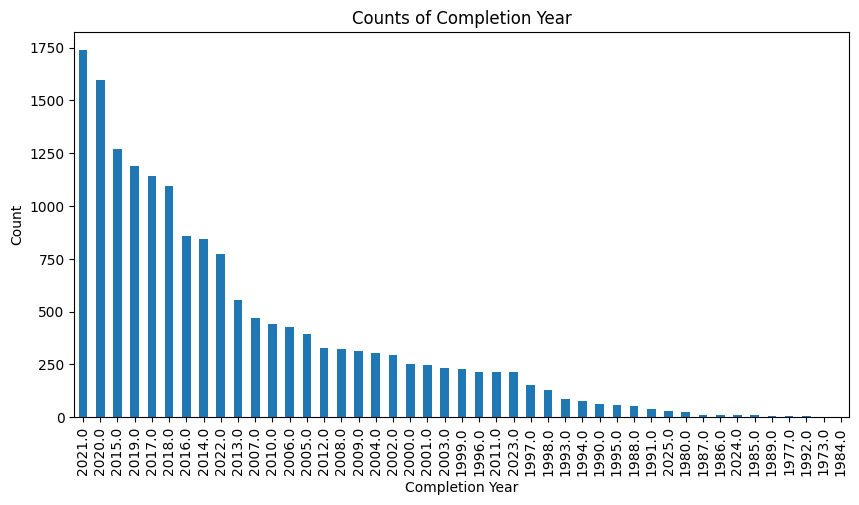

In [28]:
year_counts = df['completion_year'].value_counts()
year_counts.plot.bar(figsize=(10, 5))

year_counts.plot.bar()

plt.xlabel('Completion Year')
plt.ylabel('Count')
plt.title('Counts of Completion Year')

plt.show()

From this graph, it can be seen that most of the properties were completed in 2021, followed by 2020 and 2015. Overall, most of the properties are completed after the year 2000.

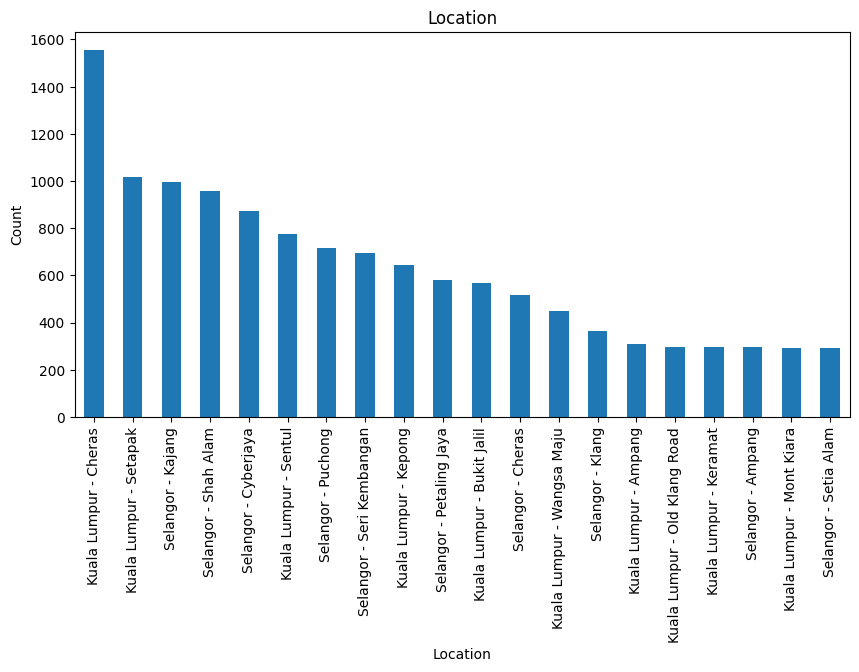

In [29]:
location_counts = df['location'].value_counts().nlargest(20)
location_counts.plot.bar(figsize=(10, 5))

location_counts.plot.bar()

plt.xlabel('Location')
plt.ylabel('Count')
plt.title('Location')

plt.show()

These are the top 20 location that has properties listed for rental. Cheras has the highest listing of properties for rent followed by Setapak and Kajang.

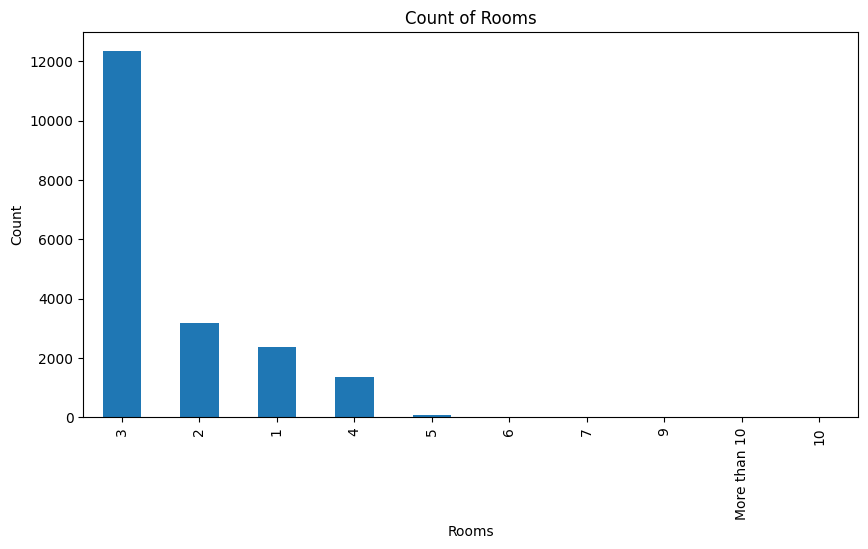

In [30]:
rooms_counts = df['rooms'].value_counts()
rooms_counts.plot.bar(figsize=(10, 5))

rooms_counts.plot.bar()

plt.xlabel('Rooms')
plt.ylabel('Count')
plt.title('Count of Rooms')

plt.show()

Majority of the properties listed out for rent in these two regions has 3 rooms followed by 2 rooms. From the graph above, it can also be seen that there are non-numeric values there that needs to be removed later.

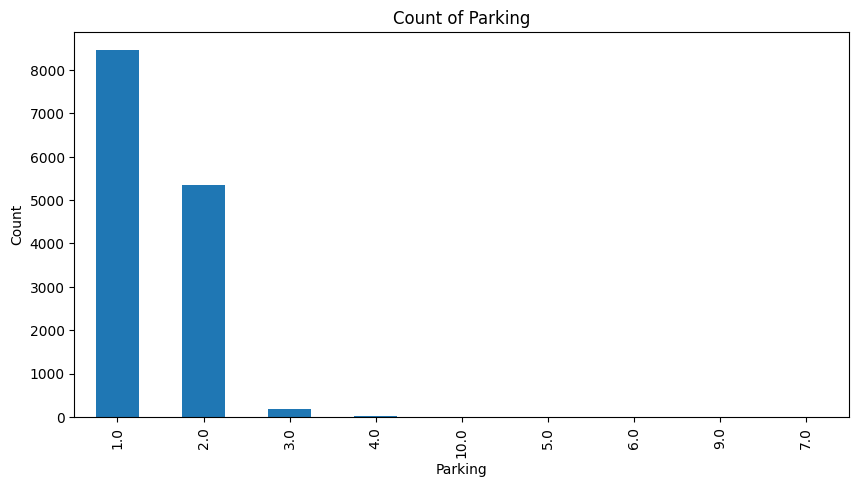

In [31]:
parking_counts = df['parking'].value_counts()
parking_counts.plot.bar(figsize=(10, 5))

parking_counts.plot.bar()

plt.xlabel('Parking')
plt.ylabel('Count')
plt.title('Count of Parking')

plt.show()

Most of the properties listed for rent offers at least 1 parking. Apparently there are properties offering up to 10 parking spots. This will be investigate further during the data cleaning process.

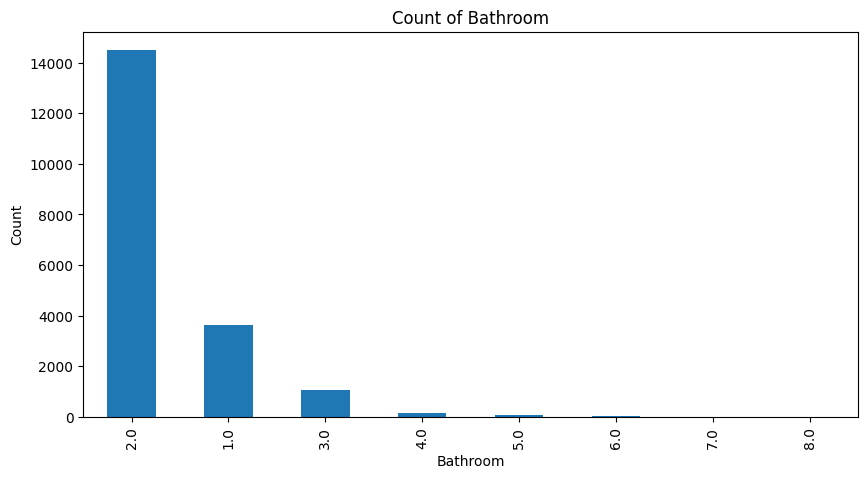

In [32]:
bathroom_counts = df['bathroom'].value_counts()
bathroom_counts.plot.bar(figsize=(10, 5))

bathroom_counts.plot.bar()

plt.xlabel('Bathroom')
plt.ylabel('Count')
plt.title('Count of Bathroom')

plt.show()

From the graph above, majority of the properties listed have 2 bathrooms which is common. Similarly, a residential unit having 8 bathrooms is unusual and shall be investigated later during the data cleaning process.

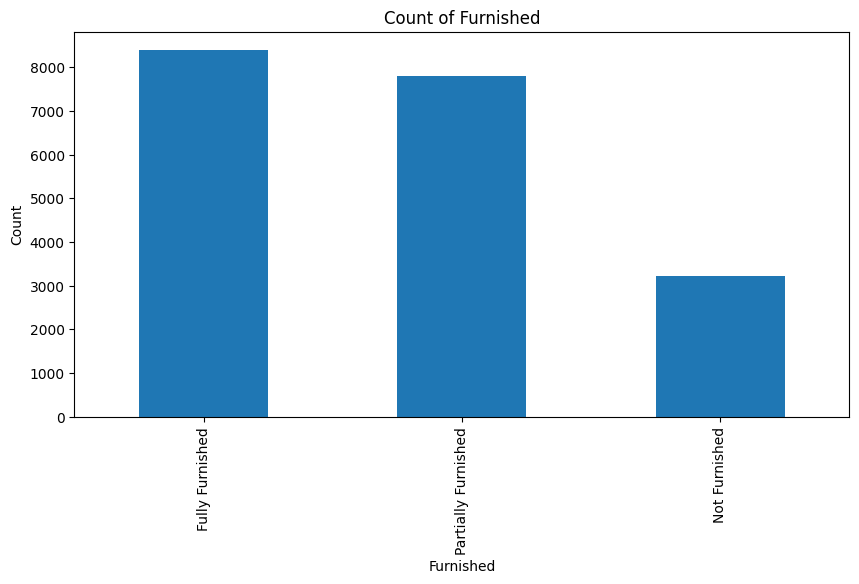

In [33]:
furnished_counts = df['furnished'].value_counts()
furnished_counts.plot.bar(figsize=(10, 5))

furnished_counts.plot.bar()

plt.xlabel('Furnished')
plt.ylabel('Count')
plt.title('Count of Furnished')

plt.show()

Most of the units offered are fully furnished, followed by partially furnished.

## Cleaning and Feature Engineering

### Checking for duplicates

In [34]:
df.duplicated().sum()

8

In [35]:
df.drop_duplicates(inplace = True)

In [36]:
df.duplicated().sum()

0

### Checking for missing values

In [37]:
df.isna().sum()

ads_id                      0
prop_name                 948
completion_year          2711
monthly_rent                1
location                    0
property_type               0
rooms                       6
parking                  5412
bathroom                    6
size                        0
furnished                   4
facilities               2037
additional_facilities    5740
region                      0
dtype: int64

Now, lets deal with missing values. Above, it can be seen that 8 columns have missing values. Let's do it in order and start with prop_name.

Since, the goal is to predict the monthly rental price around KL and Selangor, the property names will not play a significant role. However, there are 948 missing values for prop_name. Therefore, instead of simply dropping it, I will fill it with 'NaN' values to retain the 948 rows which may impact the overall ML model.

In [38]:
df['prop_name'].fillna(value = np.NaN, inplace = True)

We can see that completion_year has 2711 missing values. Generally, the age of the building will have an impact on its market price, thus affecting the monthly rental rate. Of course, there are other factors that comes in play such as how well was the building maintained throughout the years, whether its built as a low-cost living area, location and etc. But as a rule of thumb, as time goes on, a building will suffer from loss of functionality and quality and physical deterioration. 

Therefore, instead of imputing it with the completed_year modes or medians, I believe it is best to drop the rows with missing completed_year values. We will see how it goes when running the final ML model.

In [39]:
df1 = df.dropna(subset = ['completion_year']).copy()

In [40]:
df1.isna().sum()

ads_id                      0
prop_name                   0
completion_year             0
monthly_rent                0
location                    0
property_type               0
rooms                       0
parking                  4177
bathroom                    0
size                        0
furnished                   0
facilities               1578
additional_facilities    4777
region                      0
dtype: int64

Looks like dropping all the missing values for completion_year also removed the missing values for prop_name, monthly_rent, rooms, bathroom and furnished.

Now, lets deal with the remaining three - parking, facilities and additional_facilities.

In [41]:
pd.set_option('max_colwidth', 200)
pd.reset_option('display.max_rows')
df1[['parking', 'facilities','additional_facilities']]

,parking,facilities,additional_facilities
0,NaN,NaN,NaN
1,1.0,"Playground, Gymnasium, Jogging Track, Swimming Pool, Tennis Court, Security, Parking, Lift, Barbeque area, Minimart, Multipurpose hall",Cooking Allowed
2,1.0,"Playground, Gymnasium, Jogging Track, Swimming Pool, Tennis Court, Security, Parking, Lift, Minimart, Multipurpose hall, Barbeque area",Cooking Allowed
3,NaN,"Gymnasium, Jogging Track, Tennis Court, Security, Playground, Swimming Pool, Parking, Lift, Barbeque area, Minimart, Multipurpose hall, Squash Court","Cooking Allowed, Near KTM/LRT, Internet"
4,1.0,"Gymnasium, Jogging Track, Tennis Court, Security, Playground, Swimming Pool, Parking, Lift, Barbeque area, Minimart, Multipurpose hall, Squash Court","Cooking Allowed, Near KTM/LRT, Internet"
...,...,...,...
18471,1.0,"Club house, Security, Jogging Track, Sauna, Swimming Pool, Gymnasium, Barbeque area, Parking, Lift, Playground, Minimart","Air-Cond, Cooking Allowed"
18472,1.0,"Parking, Gymnasium, Jogging Track, Barbeque area, Club house, Security, Swimming Pool, Sauna","Air-Cond, Cooking Allowed, Near KTM/LRT, Washing Machine"
18473,2.0,"Gymnasium, Sauna, Club house, Security, Jogging Track, Parking, Swimming Pool, Barbeque area, Lift, Minimart, Multipurpose hall, Playground","Air-Cond, Cooking Allowed, Near KTM/LRT"
18474,1.0,"Security, Gymnasium, Club house, Swimming Pool, Jogging Track, Barbeque area, Parking, Sauna",NaN


We can see that there are a few missing values in parking despite having 'Parking' mentioned in the facilities. Instead of just dropping these missing values, lets assume that whenever 'Parking' is mentioned in the facilities, it can be considered as 1.

In [42]:
df1.loc[df['facilities'].str.contains('Parking', na = False), 'parking'] = df1['parking'].fillna(1)

In [43]:
df1['parking'].isna().sum()

1236

Its quite rare to rent out an entire unit without providing a single parking space for the tenants. Therefore, we will fill up the remaining missing values with the mode which is 1.

In [44]:
mode_value = df1['parking'].mode()[0]
print("Mode:", mode_value)

Mode: 1.0


In [45]:
df1['parking'] = df1['parking'].fillna(mode_value)

In [46]:
df1['parking'].isna().sum()

0

Lets check all the unique words that appears in the facilities variable. 

In [47]:
combined_words = df1['facilities'].str.cat(sep = ', ')
all_words = combined_words.split(', ')
unique_words = set(all_words)

In [48]:
unique_words

{'Barbeque area',
 'Club house',
 'Gymnasium',
 'Jogging Track',
 'Lift',
 'Minimart',
 'Multipurpose hall',
 'Parking',
 'Playground',
 'Sauna',
 'Security',
 'Squash Court',
 'Swimming Pool',
 'Tennis Court'}

In [49]:
df1[df1['facilities'].isnull()]

,ads_id,prop_name,completion_year,monthly_rent,location,property_type,rooms,parking,bathroom,size,furnished,facilities,additional_facilities,region
0,100237862,Carmila Apartment Kota Damansara,2006.0,RM 1 200 per month,Selangor - Kota Damansara,Apartment,3,1.0,2.0,800 sq.ft.,Fully Furnished,NaN,NaN,Selangor
40,100106033,10 Stonor,2019.0,RM 4 000 per month,Kuala Lumpur - KL City,Condominium,2,1.0,2.0,801 sq.ft.,Fully Furnished,NaN,NaN,Kuala Lumpur
45,100849430,125 Rich Residence @ Rawang,2021.0,RM 1 200 per month,Selangor - Rawang,Apartment,3,1.0,2.0,898 sq.ft.,Fully Furnished,NaN,NaN,Selangor
115,100280695,288 Residency,2014.0,RM 1 800 per month,Kuala Lumpur - Setapak,Condominium,4,1.0,3.0,1362 sq.ft.,Partially Furnished,NaN,NaN,Kuala Lumpur
116,99409396,288 Residency,2014.0,RM 2 450 per month,Kuala Lumpur - Setapak,Condominium,4,2.0,4.0,1896 sq.ft.,Not Furnished,NaN,Cooking Allowed,Kuala Lumpur
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18417,100550900,YOU Vista @ YOU City Cheras,2016.0,RM 1 600 per month,Selangor - Cheras,Service Residence,2,2.0,2.0,850 sq.ft.,Partially Furnished,NaN,NaN,Selangor
18455,100167062,Zeta Deskye Residence,2016.0,RM 1 500 per month,Kuala Lumpur - Jalan Ipoh,Condominium,3,1.0,2.0,1037 sq.ft.,Partially Furnished,NaN,NaN,Kuala Lumpur
18457,98185495,Zeta Deskye Residence,2016.0,RM 1 500 per month,Kuala Lumpur - Jalan Ipoh,Condominium,3,1.0,2.0,1037 sq.ft.,Partially Furnished,NaN,NaN,Kuala Lumpur
18458,99934775,Zeta Deskye Residence,2016.0,RM 1 600 per month,Kuala Lumpur - Jalan Ipoh,Condominium,3,1.0,2.0,1037 sq.ft.,Fully Furnished,NaN,NaN,Kuala Lumpur


In [50]:
df1[df1['prop_name'] == '10 Stonor']

,ads_id,prop_name,completion_year,monthly_rent,location,property_type,rooms,parking,bathroom,size,furnished,facilities,additional_facilities,region
40,100106033,10 Stonor,2019.0,RM 4 000 per month,Kuala Lumpur - KL City,Condominium,2,1.0,2.0,801 sq.ft.,Fully Furnished,NaN,NaN,Kuala Lumpur
41,99758183,10 Stonor,2019.0,RM 3 200 per month,Kuala Lumpur - KL City,Service Residence,2,1.0,2.0,801 sq.ft.,Fully Furnished,"Parking, Security, Lift, Swimming Pool, Playground, Gymnasium, Multipurpose hall","Air-Cond, Cooking Allowed, Near KTM/LRT, Washing Machine",Kuala Lumpur


By taking out an example (10 Stonor), we can see that one of it has the facilities value filled while the other is missing. Since they are both the same building, they should be sharing the same facilities such as swimming pool, lift, etc. Lets try to fill up the facilities based on the same prop_name.

In [51]:
df1['facilities'] = df1.groupby('prop_name')['facilities'].transform(lambda x: x.fillna(x.mode()[0]) if x.notnull().any() else x)

In [52]:
df1[df1['prop_name'] == '10 Stonor']

,ads_id,prop_name,completion_year,monthly_rent,location,property_type,rooms,parking,bathroom,size,furnished,facilities,additional_facilities,region
40,100106033,10 Stonor,2019.0,RM 4 000 per month,Kuala Lumpur - KL City,Condominium,2,1.0,2.0,801 sq.ft.,Fully Furnished,"Parking, Security, Lift, Swimming Pool, Playground, Gymnasium, Multipurpose hall",NaN,Kuala Lumpur
41,99758183,10 Stonor,2019.0,RM 3 200 per month,Kuala Lumpur - KL City,Service Residence,2,1.0,2.0,801 sq.ft.,Fully Furnished,"Parking, Security, Lift, Swimming Pool, Playground, Gymnasium, Multipurpose hall","Air-Cond, Cooking Allowed, Near KTM/LRT, Washing Machine",Kuala Lumpur


In [53]:
# just to double check the others are filled as well

df1[df1['prop_name'] == '288 Residency']

,ads_id,prop_name,completion_year,monthly_rent,location,property_type,rooms,parking,bathroom,size,furnished,facilities,additional_facilities,region
115,100280695,288 Residency,2014.0,RM 1 800 per month,Kuala Lumpur - Setapak,Condominium,4,1.0,3.0,1362 sq.ft.,Partially Furnished,"Parking, Lift, Tennis Court, Swimming Pool, Minimart",NaN,Kuala Lumpur
116,99409396,288 Residency,2014.0,RM 2 450 per month,Kuala Lumpur - Setapak,Condominium,4,2.0,4.0,1896 sq.ft.,Not Furnished,"Parking, Lift, Tennis Court, Swimming Pool, Minimart",Cooking Allowed,Kuala Lumpur
117,99525624,288 Residency,2014.0,RM 1 700 per month,Kuala Lumpur - Setapak,Condominium,4,1.0,3.0,1408 sq.ft.,Partially Furnished,"Parking, Security, Swimming Pool, Playground, Lift, Gymnasium","Air-Cond, Cooking Allowed",Kuala Lumpur
118,99966416,288 Residency,2014.0,RM 1 899 per month,Kuala Lumpur - Setapak,Condominium,4,2.0,4.0,1440 sq.ft.,Partially Furnished,"Parking, Lift, Tennis Court, Swimming Pool, Minimart","Air-Cond, Internet, Cooking Allowed, Washing Machine",Kuala Lumpur


In [54]:
df1['facilities'].isna().sum()

91

Now, its just 91 missing values for facilities. Lets keep it first without dropping it. The final variable with missing values to deal with is the additional_facilities. Similarly to facilities, lets see what unique words does it have.

In [55]:
combined_words = df1['additional_facilities'].str.cat(sep = ', ')
all_words = combined_words.split(', ')
unique_words = set(all_words)

In [56]:
unique_words

{'',
 'Air-Cond',
 'Cooking Allowed',
 'Internet',
 'Near KTM/LRT',
 'Washing Machine'}

Anyone would know that staying near any form of public transportation is greatly desirable. Therefore, I believe 'Near KTM/LRT' should be kept and used in this ML model. We will deal with this after we clean up the rest of the dataset.

### Text Cleaning

In [57]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16705 entries, 0 to 18475
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ads_id                 16705 non-null  int64  
 1   prop_name              16705 non-null  object 
 2   completion_year        16705 non-null  float64
 3   monthly_rent           16705 non-null  object 
 4   location               16705 non-null  object 
 5   property_type          16705 non-null  object 
 6   rooms                  16705 non-null  object 
 7   parking                16705 non-null  float64
 8   bathroom               16705 non-null  float64
 9   size                   16705 non-null  object 
 10  furnished              16705 non-null  object 
 11  facilities             16614 non-null  object 
 12  additional_facilities  11928 non-null  object 
 13  region                 16705 non-null  object 
dtypes: float64(3), int64(1), object(10)
memory usage: 2.4+

In [58]:
df1.head(1)

,ads_id,prop_name,completion_year,monthly_rent,location,property_type,rooms,parking,bathroom,size,furnished,facilities,additional_facilities,region
0,100237862,Carmila Apartment Kota Damansara,2006.0,RM 1 200 per month,Selangor - Kota Damansara,Apartment,3,1.0,2.0,800 sq.ft.,Fully Furnished,NaN,NaN,Selangor


There are a few words that needs to be removed. There are 3 variables with words that needs to be removed:
1. size
2. location
3. monthly_rent

In [59]:
# size - Extract the 'sq.ft.' and rename the variable to a more meaningful name.

df1['size_sqf'] = df1['size'].str.replace(' sq.ft.', '', regex = True)
df1['size_sqf'] = df1['size_sqf'].astype(float)

In [60]:
# location - Since there's already a variable named region, we can remove the Selangor and Kuala Lumpur from location.

df1['location'] = df1['location'].str.replace(r'(Kuala Lumpur|Selangor)\s*-\s*', '', regex = True)

In [61]:
# monthly_rent - Extract the RM and 'per month'. We will rename the variable to a more meaningful name.

df1['rm_monthly_rent'] = df1['monthly_rent'].str.replace(r'\s*RM|\s*per month', '', regex = True)
df1['rm_monthly_rent'] = df1['rm_monthly_rent'].str.replace(r'\s+', '', regex = True).astype(float)

In [62]:
df1.head(1)

,ads_id,prop_name,completion_year,monthly_rent,location,property_type,rooms,parking,bathroom,size,furnished,facilities,additional_facilities,region,size_sqf,rm_monthly_rent
0,100237862,Carmila Apartment Kota Damansara,2006.0,RM 1 200 per month,Kota Damansara,Apartment,3,1.0,2.0,800 sq.ft.,Fully Furnished,NaN,NaN,Selangor,800.0,1200.0


Great. Now lets drop the original monthly_rent and size

In [63]:
columns = ['monthly_rent', 'size']
df1.drop(columns, axis = 1, inplace = True)

In [64]:
df1.head(5)

,ads_id,prop_name,completion_year,location,property_type,rooms,parking,bathroom,furnished,facilities,additional_facilities,region,size_sqf,rm_monthly_rent
0,100237862,Carmila Apartment Kota Damansara,2006.0,Kota Damansara,Apartment,3,1.0,2.0,Fully Furnished,NaN,NaN,Selangor,800.0,1200.0
1,100739791,1 Harmonis,2017.0,Gombak,Condominium,3,1.0,2.0,Partially Furnished,"Playground, Gymnasium, Jogging Track, Swimming Pool, Tennis Court, Security, Parking, Lift, Barbeque area, Minimart, Multipurpose hall",Cooking Allowed,Selangor,1100.0,1600.0
2,100736631,1 Harmonis,2017.0,Gombak,Condominium,3,1.0,2.0,Partially Furnished,"Playground, Gymnasium, Jogging Track, Swimming Pool, Tennis Court, Security, Parking, Lift, Minimart, Multipurpose hall, Barbeque area",Cooking Allowed,Selangor,1338.0,1800.0
3,100714345,1 Harmonis,2017.0,Gombak,Condominium,3,1.0,2.0,Not Furnished,"Gymnasium, Jogging Track, Tennis Court, Security, Playground, Swimming Pool, Parking, Lift, Barbeque area, Minimart, Multipurpose hall, Squash Court","Cooking Allowed, Near KTM/LRT, Internet",Selangor,1100.0,1400.0
4,100714348,1 Harmonis,2017.0,Gombak,Condominium,3,1.0,2.0,Not Furnished,"Gymnasium, Jogging Track, Tennis Court, Security, Playground, Swimming Pool, Parking, Lift, Barbeque area, Minimart, Multipurpose hall, Squash Court","Cooking Allowed, Near KTM/LRT, Internet",Selangor,1338.0,1500.0


### Feature Extraction

As mentioned earlier, renting a place near any form of public transportation is highly desirable especially for students or single working adults. Lets extract this feature out to create a new variable, public_transport where 1 represents nearby and 0 as non.

In [65]:
def check_KTM_LRT(additional_facilities):
    if isinstance(additional_facilities, str) and 'Near KTM/LRT' in additional_facilities:
        return 1
    else:
        return 0

df1['public_transport'] = df1['additional_facilities'].apply(check_KTM_LRT)

In [66]:
new_column = df1.pop('public_transport')
df1.insert(df1.columns.get_loc('additional_facilities') + 1, 'public_transport', new_column)

In [67]:
# sample check

df1[df1['prop_name'] == '1 Harmonis'][['public_transport']].value_counts()

public_transport
1                   6
0                   3
dtype: int64

After extracting it we can see some inconsistent value. Since there are 6 rows stating that it is near the KTM/LRT, we will convert all the 0 to 1. Basically, we convert the values based on the mode for each property.

In [68]:
df1['public_transport'] = df1.groupby('prop_name')['public_transport'].transform('max')

In [69]:
df1[df1['prop_name'] == '1 Harmonis'][['public_transport']].value_counts()

public_transport
1                   9
dtype: int64

In [70]:
df1['public_transport'].value_counts()

1    14907
0     1798
Name: public_transport, dtype: int64

Instead of simply dropping the facilities column, we will convert it to number of facilities. We will assume that the number of facilities provided by the property will affect the price. 

In [71]:
df1['number_facilities'] = df1['facilities'].str.count(',') + 1

In [72]:
new_column1 = df1.pop('number_facilities')
df1.insert(df1.columns.get_loc('facilities') + 1, 'number_facilities', new_column1)

In [73]:
df1['number_facilities'].isna().sum()

91

In [74]:
value_counts = df1['number_facilities'].value_counts()
print(value_counts)

7.0     1906
9.0     1903
14.0    1857
8.0     1849
6.0     1705
10.0    1691
5.0     1220
11.0    1130
4.0      911
12.0     849
3.0      605
13.0     351
1.0      319
2.0      318
Name: number_facilities, dtype: int64


Similar as  before, there are still 91 missing values. Earlier we set the remaining missing value of parking as 1 and since parking is one of the unique value for facilities, we will also fill the remaining missing number_facilities with 1.

In [75]:
df1['number_facilities'] = df1['number_facilities'].fillna(1)
df1['number_facilities'].isna().sum()

0

Now we can drop facilities and additional_facilities.

In [76]:
columns1 = ['ads_id', 'facilities', 'additional_facilities']
df1.drop(columns1, axis = 1, inplace = True)

In [77]:
df1.head()

,prop_name,completion_year,location,property_type,rooms,parking,bathroom,furnished,number_facilities,public_transport,region,size_sqf,rm_monthly_rent
0,Carmila Apartment Kota Damansara,2006.0,Kota Damansara,Apartment,3,1.0,2.0,Fully Furnished,1.0,0,Selangor,800.0,1200.0
1,1 Harmonis,2017.0,Gombak,Condominium,3,1.0,2.0,Partially Furnished,11.0,1,Selangor,1100.0,1600.0
2,1 Harmonis,2017.0,Gombak,Condominium,3,1.0,2.0,Partially Furnished,11.0,1,Selangor,1338.0,1800.0
3,1 Harmonis,2017.0,Gombak,Condominium,3,1.0,2.0,Not Furnished,12.0,1,Selangor,1100.0,1400.0
4,1 Harmonis,2017.0,Gombak,Condominium,3,1.0,2.0,Not Furnished,12.0,1,Selangor,1338.0,1500.0


In [78]:
df1['rooms'] = df1['rooms'].astype(float)

In [79]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16705 entries, 0 to 18475
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   prop_name          16705 non-null  object 
 1   completion_year    16705 non-null  float64
 2   location           16705 non-null  object 
 3   property_type      16705 non-null  object 
 4   rooms              16705 non-null  float64
 5   parking            16705 non-null  float64
 6   bathroom           16705 non-null  float64
 7   furnished          16705 non-null  object 
 8   number_facilities  16705 non-null  float64
 9   public_transport   16705 non-null  int64  
 10  region             16705 non-null  object 
 11  size_sqf           16705 non-null  float64
 12  rm_monthly_rent    16705 non-null  float64
dtypes: float64(7), int64(1), object(5)
memory usage: 2.3+ MB


### Checking and Removing Outliers

In [80]:
pd.options.display.float_format = '{:.2f}'.format
iqr_table = df1[['completion_year', 'rooms', 'parking', 'bathroom', 'number_facilities', 'size_sqf', 'rm_monthly_rent']].describe()
iqr_table

,completion_year,rooms,parking,bathroom,number_facilities,size_sqf,rm_monthly_rent
count,16705.00,16705.00,16705.00,16705.00,16705.00,16705.00,16705.00
mean,2013.50,2.66,1.32,1.90,8.27,6915.20,2236.13
std,7.81,0.83,0.51,0.55,3.35,773700.39,22829.19
min,1973.00,1.00,1.00,1.00,1.00,1.00,70.00
25%,2009.00,2.00,1.00,2.00,6.00,770.00,1200.00
50%,2016.00,3.00,1.00,2.00,8.00,900.00,1500.00
75%,2020.00,3.00,2.00,2.00,11.00,1050.00,1900.00
max,2025.00,9.00,10.00,8.00,14.00,99999999.00,2400000.00


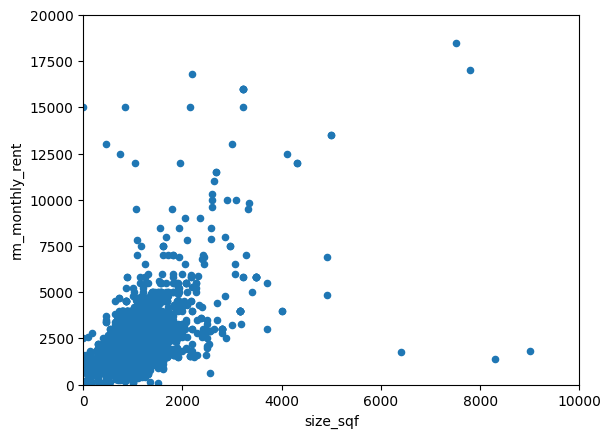

In [81]:
df1[['size_sqf', 'rm_monthly_rent']].plot(kind = 'scatter', x = 'size_sqf', y = 'rm_monthly_rent');
plt.ylim(0, 20000)
plt.xlim(0, 10000) 
plt.show()

### Checking Outlier for rm_monthly_rental

In [82]:
Q1_rent = iqr_table['rm_monthly_rent'].loc['25%']
Q3_rent = iqr_table['rm_monthly_rent'].loc['75%']
IQR_rent = Q3_rent - Q1_rent

In [83]:
#lower_bound_rental = Q1_rent - 1.5 * IQR_rent
#upper_bound_rental = Q3_rent + 1.5 * IQR_rent
lower_bound_rental = 500
upper_bound_rental = 6000 

In [84]:
outliers_rental = df1[(df1['rm_monthly_rent'] < lower_bound_rental) | (df1['rm_monthly_rent'] > upper_bound_rental)]

In [85]:
outliers_rental[['prop_name','rm_monthly_rent']].count()
#outliers_rental

prop_name          158
rm_monthly_rent    158
dtype: int64

In [86]:
df_outlier_removed = df1[~((df1['rm_monthly_rent'] < lower_bound_rental) | (df1['rm_monthly_rent'] > upper_bound_rental))]
df_outlier_removed.count()

prop_name            16547
completion_year      16547
location             16547
property_type        16547
rooms                16547
parking              16547
bathroom             16547
furnished            16547
number_facilities    16547
public_transport     16547
region               16547
size_sqf             16547
rm_monthly_rent      16547
dtype: int64

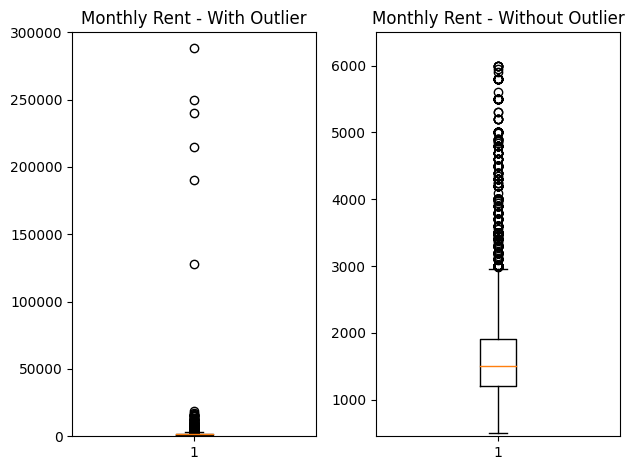

In [87]:
fig, axs = plt.subplots(1,2)
axs[0].boxplot(data = df1, x = 'rm_monthly_rent')
axs[0].set_ylim(0,300000)
axs[0].set_title('Monthly Rent - With Outlier')

axs[1].boxplot(data = df_outlier_removed, x = 'rm_monthly_rent')
axs[1].set_ylim(450,6500)
axs[1].set_title('Monthly Rent - Without Outlier')

fig.tight_layout()

### Checking Outlier for size_sqf

In [88]:
Q1_size = iqr_table['size_sqf'].loc['25%']
Q3_size = iqr_table['size_sqf'].loc['75%']
IQR_size = Q3_size - Q1_size

In [89]:
#lower_bound_size = Q1_size - 1.5 * IQR_size
lower_bound_size = 400
#upper_bound_size = Q3_size + 1.5 * IQR_size
upper_bound_size = 4000

In [90]:
outliers_size = df_outlier_removed[(df_outlier_removed['size_sqf'] < lower_bound_size) | (df_outlier_removed['size_sqf'] > upper_bound_size)]

In [91]:
outliers_size[['prop_name','size_sqf']].count()

prop_name    259
size_sqf     259
dtype: int64

In [92]:
df_outlier_removed1 = df_outlier_removed[~((df_outlier_removed['size_sqf'] < lower_bound_size) | (df_outlier_removed['size_sqf'] > upper_bound_size))]

In [93]:
df_outlier_removed1.count()

prop_name            16288
completion_year      16288
location             16288
property_type        16288
rooms                16288
parking              16288
bathroom             16288
furnished            16288
number_facilities    16288
public_transport     16288
region               16288
size_sqf             16288
rm_monthly_rent      16288
dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

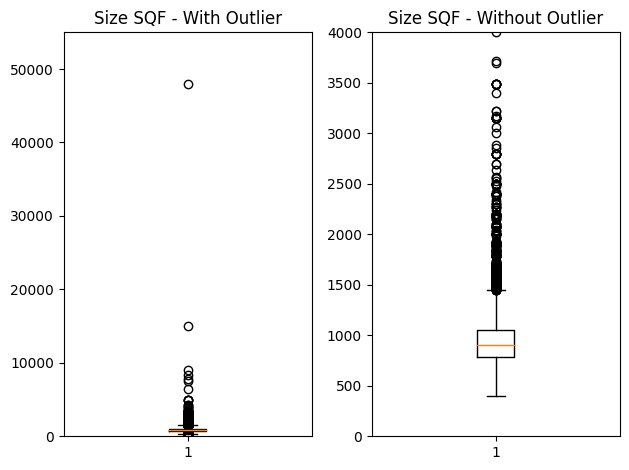

In [94]:
fig, axs = plt.subplots(1,2)
axs[0].boxplot(data = df1, x = 'size_sqf')
axs[0].set_ylim(0,55000)
axs[0].set_title('Size SQF - With Outlier')

axs[1].boxplot(data = df_outlier_removed1, x = 'size_sqf')
axs[1].set_ylim(0, 4000)
axs[1].set_title('Size SQF - Without Outlier')

plt.tight_layout()
plt.show

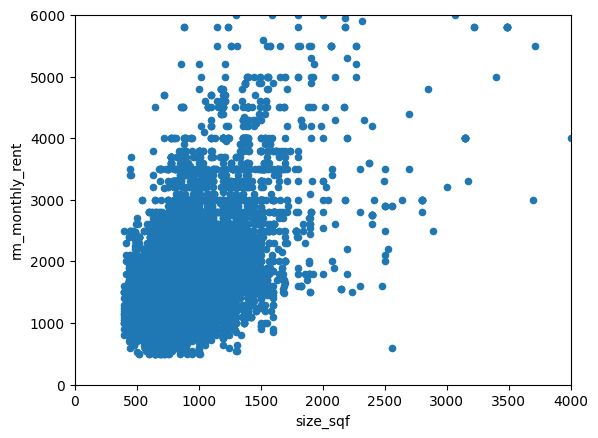

In [95]:
df_outlier_removed1[['size_sqf', 'rm_monthly_rent']].plot(kind = 'scatter', x = 'size_sqf', y = 'rm_monthly_rent');
plt.ylim(0, 6000)
plt.xlim(0, 4000) 
plt.show()

### Checking Outliers for Rooms

In [96]:
Q1_rooms = iqr_table['rooms'].loc['25%']
Q3_rooms = iqr_table['rooms'].loc['75%']
IQR_rooms = Q3_rooms - Q1_rooms

In [97]:
lower_bound_rooms = Q1_rooms - 1.5 * IQR_rooms
upper_bound_rooms = Q3_rooms + 1.5 * IQR_rooms

In [98]:
outliers_room = df_outlier_removed1[(df_outlier_removed1['rooms'] < lower_bound_rooms) | (df_outlier_removed1['rooms'] > upper_bound_rooms)]

In [99]:
#d.set_option('display.max_rows', None)
pd.reset_option('display.max_rows')
outliers_room[['prop_name','rooms', 'size_sqf']]

,prop_name,rooms,size_sqf
1401,Astoria Ampang,5.00,888.00
1431,Ativo Suites @ Damansara Avenue,5.00,1498.00
1995,Binjai Residency,6.00,2178.00
2672,Changkat View Condominium,5.00,1100.00
2740,CitiZen,5.00,1194.00
...,...,...,...
18026,Vista Komanwel,6.00,1400.00
18027,Vista Komanwel,6.00,1410.00
18028,Vista Komanwel,6.00,1400.00
18319,Wangsa Heights,6.00,2700.00


A quick glimpse through the 98 outliers detected when performing IQR, we can see some weird values. For example, in row 13165 where it only has a square feet of 900 but comes with 9 rooms. It is not common for properties in Malaysia to have a micro rooms. But again, it is not 100% impossible. I will make a few assumptions:
1. There are no micro rooms (~150-350 sq.ft.) available and its simply misinformation.
2. Those units with small size (sq.ft.) but comes with many rooms are either renovated by removing the kitchen, living room, etc for additional room. 
3. These units are dedicated hostels for students or workers.

With these assumptions, I will set my own conditions where any unit with less than 1500 sq.ft but has 5 rooms will be considered as outlier and will be removed. Afterall, the goal is to determine the monthly rental prices of these properties that can be accessible to anyone.

In [100]:
pd.reset_option('display.max_rows')

outliers_room = df_outlier_removed1[(df_outlier_removed1['size_sqf'] < 1500) & (df_outlier_removed1['rooms'] >= 5)]
outliers_room[['prop_name','rooms', 'size_sqf']].count()

prop_name    39
rooms        39
size_sqf     39
dtype: int64

In [101]:
df_outlier_removed2 = df_outlier_removed1[~((df_outlier_removed1['size_sqf'] < 1500) & (df_outlier_removed1['rooms'] >= 5))]

In [102]:
pd.reset_option('display.max_rows')
df_outlier_removed2.count()

prop_name            16249
completion_year      16249
location             16249
property_type        16249
rooms                16249
parking              16249
bathroom             16249
furnished            16249
number_facilities    16249
public_transport     16249
region               16249
size_sqf             16249
rm_monthly_rent      16249
dtype: int64

Text(0, 0.5, 'Count')

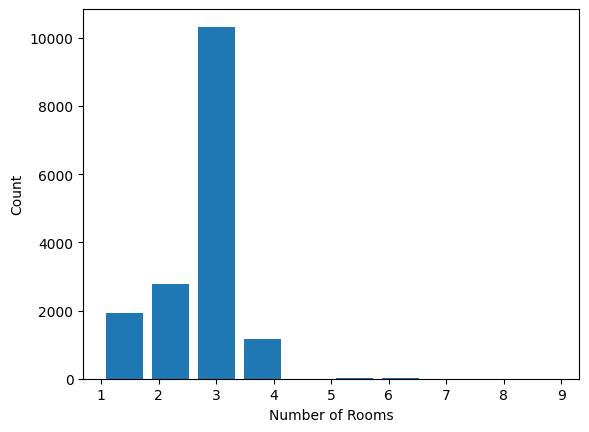

In [103]:
plt.hist(df_outlier_removed2.rooms, rwidth = 0.8)
plt.xlabel("Number of Rooms")
plt.ylabel("Count")

### Checking Outlier for Bathrooms

Generally, it is really uncommon for condo/apartment/flat units in Malaysia to have more bathrooms than rooms. First, we will check how many rows have bathrooms > rooms. 

In [104]:
outliers_bathroom = df_outlier_removed2[df_outlier_removed2['bathroom'] > df_outlier_removed2['rooms']]
outliers_bathroom[['prop_name','rooms','bathroom', 'size_sqf']]

,prop_name,rooms,bathroom,size_sqf
54,1A Stonor,4.00,5.00,2000.00
59,202 Desa Cahaya,3.00,4.00,1700.00
201,3 Towers,1.00,2.00,850.00
209,3 Towers,1.00,2.00,832.00
243,6 CapSquare,2.00,3.00,1432.00
...,...,...,...,...
18353,Windows on The Park,3.00,4.00,2200.00
18389,X2 Residency,4.00,5.00,2415.00
18407,YOU Vista @ YOU City Cheras,1.00,2.00,737.00
18411,YOU Vista @ YOU City Cheras,1.00,2.00,737.00


We can see that there are 278 rows with bathrooms > rooms. Instead of simply dropping it, we will make changes by performing imputation with the following assumptions:
1. number of rooms must be >= number of bathrooms
2. if number of rooms <= 3, then number of bathrooms = number of rooms
3. if number of rooms >=4 , then number of bathrooms will always be -1 number of rooms

By applying these assumptions, we will see whether if it affect the ML model performance.

In [105]:
outliers_bathroom = outliers_bathroom.copy()
outliers_bathroom.loc[:, 'bathroom'] = np.where(outliers_bathroom['rooms'] <= 3, outliers_bathroom['rooms'], outliers_bathroom['rooms'] - 1)

In [106]:
outliers_bathroom[['rooms','bathroom']]

,rooms,bathroom
54,4.00,3.00
59,3.00,3.00
201,1.00,1.00
209,1.00,1.00
243,2.00,2.00
...,...,...
18353,3.00,3.00
18389,4.00,3.00
18407,1.00,1.00
18411,1.00,1.00


In [107]:
df_outlier_removed2.loc[outliers_bathroom.index, 'bathroom'] = outliers_bathroom['bathroom']

In [108]:
df_outlier_removed3 = df_outlier_removed2.copy()

In [109]:
print(df_outlier_removed3[df_outlier_removed2['bathroom'] > df_outlier_removed2['rooms']])

Empty DataFrame
Columns: [prop_name, completion_year, location, property_type, rooms, parking, bathroom, furnished, number_facilities, public_transport, region, size_sqf, rm_monthly_rent]
Index: []


Text(0, 0.5, 'Count')

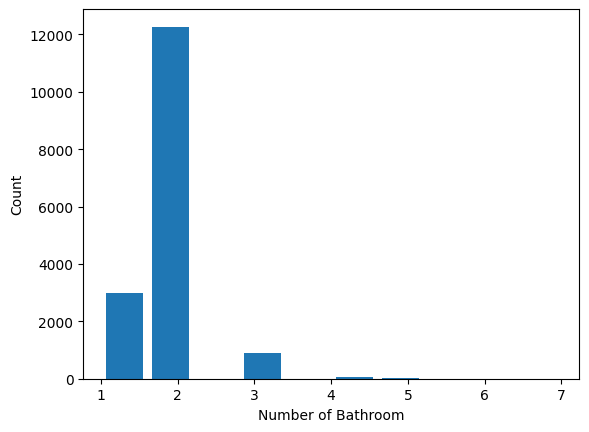

In [110]:
plt.hist(df_outlier_removed2.bathroom, rwidth = 0.8)
plt.xlabel("Number of Bathroom")
plt.ylabel("Count")

### Checking Outlier for Parking

In [111]:
value_counts = df_outlier_removed2['parking'].value_counts()
print(value_counts)

1.00     11283
2.00      4812
3.00       133
4.00        13
5.00         4
10.00        2
9.00         1
7.00         1
Name: parking, dtype: int64


Again, in Malaysia, it is really uncommon for any properties to provide more than 4 parkings. Lets have a look at the outliers with IQR

In [112]:
Q1_park = iqr_table['parking'].loc['25%']
Q3_park = iqr_table['parking'].loc['75%']
IQR_park = Q3_park - Q1_park

In [113]:
lower_bound_park = Q1_park - 1.5 * IQR_park
upper_bound_park = Q3_park + 1.5 * IQR_park

In [114]:
outliers_park = df_outlier_removed3[(df_outlier_removed3['parking'] < lower_bound_park) | (df_outlier_removed3['parking'] > upper_bound_park)]

In [115]:
outliers_park[['prop_name','completion_year','parking']]

,prop_name,completion_year,parking
4981,Gugusan Melur,2017.00,10.00
8585,Monet Lily @ Monet Residences Sunsuria City,2019.00,4.00
9701,Pangsapuri Palma (Bandar Botanic),2015.00,10.00
11303,PV9 Residence,2022.00,5.00
13467,Seri Mutiara Apartment @ Setia Alam,2015.00,5.00
13608,Serunai,2020.00,5.00
14064,Sky Vista Residency,2014.00,4.00
14345,Sphere Damansara,2016.00,4.00
14351,Sphere Damansara,2016.00,4.00
14354,Sphere Damansara,2016.00,4.00


As expected, anything greater or equal to 4 is considered as an outlier. However, we shall not rule out the possibility of having 4 parking spaces. We will impute the parking values with the mode based on their own property names.

In [116]:
parking_mode = df_outlier_removed3.groupby('prop_name')['parking'].apply(lambda x: x.mode().iat[0])
parking_mode

prop_name
1 Harmonis            1.00
1 Petaling            1.00
1 Razak Mansion       1.00
1 Sentul              1.00
10 Semantan           1.00
                      ... 
i-Suite @ i-City      1.00
i-Zen @ Kiara 1       1.00
i-Zen @ Kiara 2       2.00
myHabitat             1.00
pelangi condominium   1.00
Name: parking, Length: 1686, dtype: float64

In [117]:
outliers_park1 = outliers_park.copy()

outliers_park1.loc[:, 'parking'] = outliers_park1['prop_name'].map(parking_mode).replace(outliers_park1['parking'])

In [118]:
outliers_park1[['prop_name','completion_year','parking']]

,prop_name,completion_year,parking
4981,Gugusan Melur,2017.00,10.00
8585,Monet Lily @ Monet Residences Sunsuria City,2019.00,1.00
9701,Pangsapuri Palma (Bandar Botanic),2015.00,1.00
11303,PV9 Residence,2022.00,1.00
13467,Seri Mutiara Apartment @ Setia Alam,2015.00,2.00
13608,Serunai,2020.00,1.00
14064,Sky Vista Residency,2014.00,2.00
14345,Sphere Damansara,2016.00,1.00
14351,Sphere Damansara,2016.00,1.00
14354,Sphere Damansara,2016.00,1.00


Now it looks better, except for Gugusan Melur having 10 parking spaces. Since its only 1 row, a quick Google search confirmed that it is not possible for that property to come with 10 parking spaces. We will simply drop that 1 row in the main dataframe.

In [119]:
df_outlier_removed3.loc[outliers_park1.index, 'parking'] = outliers_park1['parking']

In [120]:
df_outlier_removed4 = df_outlier_removed3.drop(df_outlier_removed3[df_outlier_removed3['prop_name'] == 'Gugusan Melur'].index)

Text(0, 0.5, 'Count')

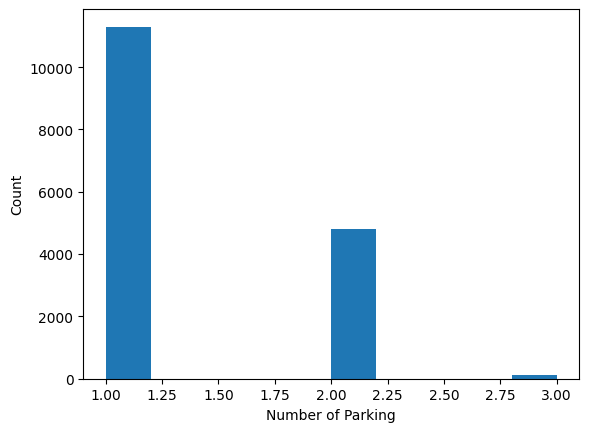

In [121]:
plt.hist(df_outlier_removed4.parking)
plt.xlabel("Number of Parking")
plt.ylabel("Count")

<function matplotlib.pyplot.show(close=None, block=None)>

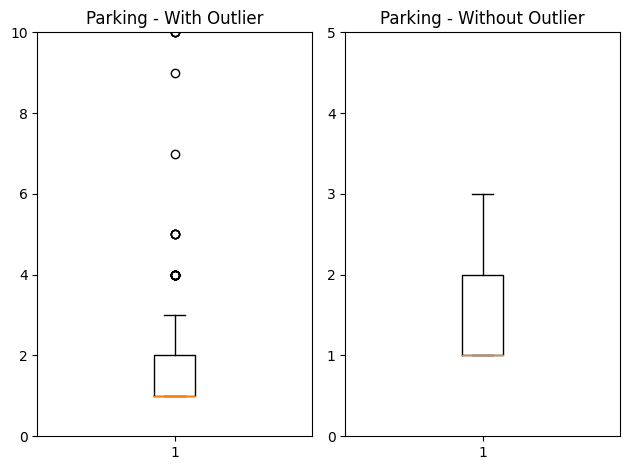

In [122]:
fig, axs = plt.subplots(1,2)
axs[0].boxplot(data = df1, x = 'parking')
axs[0].set_ylim(0,10)
axs[0].set_title('Parking - With Outlier')

axs[1].boxplot(data = df_outlier_removed4, x = 'parking')
axs[1].set_ylim(0,5)
axs[1].set_title('Parking - Without Outlier')

plt.tight_layout()
plt.show

In [123]:
# renaming the dataframe
df_cleaned = df_outlier_removed4.copy()

In [124]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16248 entries, 0 to 18475
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   prop_name          16248 non-null  object 
 1   completion_year    16248 non-null  float64
 2   location           16248 non-null  object 
 3   property_type      16248 non-null  object 
 4   rooms              16248 non-null  float64
 5   parking            16248 non-null  float64
 6   bathroom           16248 non-null  float64
 7   furnished          16248 non-null  object 
 8   number_facilities  16248 non-null  float64
 9   public_transport   16248 non-null  int64  
 10  region             16248 non-null  object 
 11  size_sqf           16248 non-null  float64
 12  rm_monthly_rent    16248 non-null  float64
dtypes: float64(7), int64(1), object(5)
memory usage: 1.7+ MB


## Preprocessing Categorical Data

In [125]:
df_cleaned_cont = df_cleaned.select_dtypes(exclude = 'object')
df_cleaned_cont

,completion_year,rooms,parking,bathroom,number_facilities,public_transport,size_sqf,rm_monthly_rent
0,2006.00,3.00,1.00,2.00,1.00,0,800.00,1200.00
1,2017.00,3.00,1.00,2.00,11.00,1,1100.00,1600.00
2,2017.00,3.00,1.00,2.00,11.00,1,1338.00,1800.00
3,2017.00,3.00,1.00,2.00,12.00,1,1100.00,1400.00
4,2017.00,3.00,1.00,2.00,12.00,1,1338.00,1500.00
...,...,...,...,...,...,...,...,...
18470,2015.00,3.00,2.00,2.00,11.00,1,1356.00,1600.00
18471,2015.00,1.00,1.00,1.00,11.00,1,454.00,999.00
18472,2015.00,1.00,1.00,1.00,8.00,1,454.00,1050.00
18473,2015.00,2.00,2.00,2.00,12.00,1,881.00,1300.00


In [126]:
df_cleaned_cont.isna().sum()

completion_year      0
rooms                0
parking              0
bathroom             0
number_facilities    0
public_transport     0
size_sqf             0
rm_monthly_rent      0
dtype: int64

In [127]:
df_cleaned_cat = df_cleaned.select_dtypes(include = 'object')
df_cleaned_cat

,prop_name,location,property_type,furnished,region
0,Carmila Apartment Kota Damansara,Kota Damansara,Apartment,Fully Furnished,Selangor
1,1 Harmonis,Gombak,Condominium,Partially Furnished,Selangor
2,1 Harmonis,Gombak,Condominium,Partially Furnished,Selangor
3,1 Harmonis,Gombak,Condominium,Not Furnished,Selangor
4,1 Harmonis,Gombak,Condominium,Not Furnished,Selangor
...,...,...,...,...,...
18470,Zeva @ Equine South,Seri Kembangan,Service Residence,Not Furnished,Selangor
18471,Zeva @ Equine South,Seri Kembangan,Service Residence,Partially Furnished,Selangor
18472,Zeva @ Equine South,Seri Kembangan,Service Residence,Fully Furnished,Selangor
18473,Zeva @ Equine South,Seri Kembangan,Condominium,Partially Furnished,Selangor


Lets drop unnecessary variables when building the ML model. In this case, prop_name is not needed as we do not need to know their names when predicting the monthly rental. Also, region is not needed as the location itself will let you know which region it belongs to.

In [128]:
cat_col = ['prop_name', 'region']
df_cleaned_cat.drop(cat_col, axis = 1, inplace = True)

In [129]:
df_cleaned_cat

,location,property_type,furnished
0,Kota Damansara,Apartment,Fully Furnished
1,Gombak,Condominium,Partially Furnished
2,Gombak,Condominium,Partially Furnished
3,Gombak,Condominium,Not Furnished
4,Gombak,Condominium,Not Furnished
...,...,...,...
18470,Seri Kembangan,Service Residence,Not Furnished
18471,Seri Kembangan,Service Residence,Partially Furnished
18472,Seri Kembangan,Service Residence,Fully Furnished
18473,Seri Kembangan,Condominium,Partially Furnished


In [130]:
location_counts = df_cleaned_cat['location'].value_counts()
print(location_counts)

Cheras                   1802
Setapak                   904
Cyberjaya                 814
Kajang                    808
Shah Alam                 727
                         ... 
Bandar Tasik Selatan        1
369                         1
Bukit Tunku                 1
Salak Selatan               1
Telok Panglima Garang       1
Name: location, Length: 112, dtype: int64


In [131]:
property_type_counts = df_cleaned_cat['property_type'].value_counts()
print(property_type_counts)

Condominium          7352
Service Residence    4940
Apartment            3584
Studio                161
Flat                  102
Duplex                 65
Others                 32
Townhouse Condo        12
Name: property_type, dtype: int64


In [132]:
furnished_counts = df_cleaned_cat['furnished'].value_counts()
print(furnished_counts)

Fully Furnished        7349
Partially Furnished    6655
Not Furnished          2244
Name: furnished, dtype: int64


In [133]:
df_cleaned_cat.isna().sum()

location         0
property_type    0
furnished        0
dtype: int64

In [134]:
df_cat_ohe = pd.get_dummies(df_cleaned_cat)

In [135]:
df_cat_ohe

,location_360,location_369,location_389,location_517,location_639,location_Alam Impian,location_Ampang,location_Ampang Hilir,location_Ara Damansara,location_Balakong,...,property_type_Condominium,property_type_Duplex,property_type_Flat,property_type_Others,property_type_Service Residence,property_type_Studio,property_type_Townhouse Condo,furnished_Fully Furnished,furnished_Not Furnished,furnished_Partially Furnished
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18470,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
18471,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
18472,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
18473,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1


In [136]:
# double check

df_cat_ohe.isna().sum()

location_360                     0
location_369                     0
location_389                     0
location_517                     0
location_639                     0
                                ..
property_type_Studio             0
property_type_Townhouse Condo    0
furnished_Fully Furnished        0
furnished_Not Furnished          0
furnished_Partially Furnished    0
Length: 123, dtype: int64

In [137]:
df_concat = pd.concat([df_cleaned_cont, df_cat_ohe], axis = 1)

In [138]:
df_concat

,completion_year,rooms,parking,bathroom,number_facilities,public_transport,size_sqf,rm_monthly_rent,location_360,location_369,...,property_type_Condominium,property_type_Duplex,property_type_Flat,property_type_Others,property_type_Service Residence,property_type_Studio,property_type_Townhouse Condo,furnished_Fully Furnished,furnished_Not Furnished,furnished_Partially Furnished
0,2006.00,3.00,1.00,2.00,1.00,0,800.00,1200.00,0,0,...,0,0,0,0,0,0,0,1,0,0
1,2017.00,3.00,1.00,2.00,11.00,1,1100.00,1600.00,0,0,...,1,0,0,0,0,0,0,0,0,1
2,2017.00,3.00,1.00,2.00,11.00,1,1338.00,1800.00,0,0,...,1,0,0,0,0,0,0,0,0,1
3,2017.00,3.00,1.00,2.00,12.00,1,1100.00,1400.00,0,0,...,1,0,0,0,0,0,0,0,1,0
4,2017.00,3.00,1.00,2.00,12.00,1,1338.00,1500.00,0,0,...,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18470,2015.00,3.00,2.00,2.00,11.00,1,1356.00,1600.00,0,0,...,0,0,0,0,1,0,0,0,1,0
18471,2015.00,1.00,1.00,1.00,11.00,1,454.00,999.00,0,0,...,0,0,0,0,1,0,0,0,0,1
18472,2015.00,1.00,1.00,1.00,8.00,1,454.00,1050.00,0,0,...,0,0,0,0,1,0,0,1,0,0
18473,2015.00,2.00,2.00,2.00,12.00,1,881.00,1300.00,0,0,...,1,0,0,0,0,0,0,0,0,1


In [139]:
def seperate_input_output(data, output_name):
    output_y = data[output_name]
    input_x = data.drop(output_name, axis = 1)
    
    return input_x, output_y

In [140]:
df_x, df_y = seperate_input_output (data = df_concat, output_name = 'rm_monthly_rent')

In [141]:
df_x

,completion_year,rooms,parking,bathroom,number_facilities,public_transport,size_sqf,location_360,location_369,location_389,...,property_type_Condominium,property_type_Duplex,property_type_Flat,property_type_Others,property_type_Service Residence,property_type_Studio,property_type_Townhouse Condo,furnished_Fully Furnished,furnished_Not Furnished,furnished_Partially Furnished
0,2006.00,3.00,1.00,2.00,1.00,0,800.00,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,2017.00,3.00,1.00,2.00,11.00,1,1100.00,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,2017.00,3.00,1.00,2.00,11.00,1,1338.00,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,2017.00,3.00,1.00,2.00,12.00,1,1100.00,0,0,0,...,1,0,0,0,0,0,0,0,1,0
4,2017.00,3.00,1.00,2.00,12.00,1,1338.00,0,0,0,...,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18470,2015.00,3.00,2.00,2.00,11.00,1,1356.00,0,0,0,...,0,0,0,0,1,0,0,0,1,0
18471,2015.00,1.00,1.00,1.00,11.00,1,454.00,0,0,0,...,0,0,0,0,1,0,0,0,0,1
18472,2015.00,1.00,1.00,1.00,8.00,1,454.00,0,0,0,...,0,0,0,0,1,0,0,1,0,0
18473,2015.00,2.00,2.00,2.00,12.00,1,881.00,0,0,0,...,1,0,0,0,0,0,0,0,0,1


In [142]:
df_y

0       1200.00
1       1600.00
2       1800.00
3       1400.00
4       1500.00
          ...  
18470   1600.00
18471    999.00
18472   1050.00
18473   1300.00
18475   1700.00
Name: rm_monthly_rent, Length: 16248, dtype: float64

## Data Normalization

def data_normalizer(data):
    data_columns = data.columns 
    data_index = data.index  

    normalizer = MinMaxScaler()
    normalizer.fit(data)
    normalized_data_raw = normalizer.transform(data)
    normalized_data = pd.DataFrame(normalized_data_raw)
    normalized_data.columns = data_columns
    normalized_data.index = data_index

    return normalized_data, normalizer

dfx_normalized, normalizer = data_normalizer(data = df_x)

dfx_normalized

## Data Standardization

In [143]:
from sklearn.preprocessing import StandardScaler

def data_standardizer(data):
    data_columns = data.columns 
    data_index = data.index  

    standardizer = StandardScaler()
    standardizer.fit(data)
    standardizer_data_raw = standardizer.transform(data)
    standardizer_data = pd.DataFrame(standardizer_data_raw)
    standardizer_data.columns = data_columns
    standardizer_data.index = data_index

    return standardizer_data, standardizer

In [144]:
dfx_standardized, standardizer = data_standardizer(data = df_x)

In [145]:
dfx_standardized

,completion_year,rooms,parking,bathroom,number_facilities,public_transport,size_sqf,location_360,location_369,location_389,...,property_type_Condominium,property_type_Duplex,property_type_Flat,property_type_Others,property_type_Service Residence,property_type_Studio,property_type_Townhouse Condo,furnished_Fully Furnished,furnished_Not Furnished,furnished_Partially Furnished
0,-0.96,0.42,-0.65,0.23,-2.17,-2.88,-0.45,-0.06,-0.01,-0.05,...,-0.91,-0.06,-0.08,-0.04,-0.66,-0.10,-0.03,1.10,-0.40,-0.83
1,0.45,0.42,-0.65,0.23,0.81,0.35,0.61,-0.06,-0.01,-0.05,...,1.10,-0.06,-0.08,-0.04,-0.66,-0.10,-0.03,-0.91,-0.40,1.20
2,0.45,0.42,-0.65,0.23,0.81,0.35,1.45,-0.06,-0.01,-0.05,...,1.10,-0.06,-0.08,-0.04,-0.66,-0.10,-0.03,-0.91,-0.40,1.20
3,0.45,0.42,-0.65,0.23,1.11,0.35,0.61,-0.06,-0.01,-0.05,...,1.10,-0.06,-0.08,-0.04,-0.66,-0.10,-0.03,-0.91,2.50,-0.83
4,0.45,0.42,-0.65,0.23,1.11,0.35,1.45,-0.06,-0.01,-0.05,...,1.10,-0.06,-0.08,-0.04,-0.66,-0.10,-0.03,-0.91,2.50,-0.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18470,0.19,0.42,1.43,0.23,0.81,0.35,1.52,-0.06,-0.01,-0.05,...,-0.91,-0.06,-0.08,-0.04,1.51,-0.10,-0.03,-0.91,2.50,-0.83
18471,0.19,-2.10,-0.65,-1.74,0.81,0.35,-1.68,-0.06,-0.01,-0.05,...,-0.91,-0.06,-0.08,-0.04,1.51,-0.10,-0.03,-0.91,-0.40,1.20
18472,0.19,-2.10,-0.65,-1.74,-0.08,0.35,-1.68,-0.06,-0.01,-0.05,...,-0.91,-0.06,-0.08,-0.04,1.51,-0.10,-0.03,1.10,-0.40,-0.83
18473,0.19,-0.84,1.43,0.23,1.11,0.35,-0.17,-0.06,-0.01,-0.05,...,1.10,-0.06,-0.08,-0.04,-0.66,-0.10,-0.03,-0.91,-0.40,1.20


## Train Test Split

In [146]:
# X_train, X_test, y_train, y_test = train_test_split(dfx_normalized, df_y, test_size = 0.3, random_state = 42)
X_train, X_test, y_train, y_test = train_test_split(dfx_standardized, df_y, test_size = 0.3, random_state = 42)

In [147]:
print("X_train: ", X_train.shape)
print("X_test: ", X_test.shape)
print("y_train: ", y_train.shape)
print("y_test: ", y_test.shape)

X_train:  (11373, 130)
X_test:  (4875, 130)
y_train:  (11373,)
y_test:  (4875,)


## Model Building

### Decision Tree

In [123]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [124]:
dtree_train = DecisionTreeRegressor(random_state = 42).fit(X_train, y_train)

dtree_prediction_train = dtree_train.predict(X_train)

r2_dtree_train = r2_score(y_train, dtree_prediction_train)
mae_dtree_train = mean_absolute_error(y_train, dtree_prediction_train)
mse_dtree_train =  mean_squared_error(y_train, dtree_prediction_train)
rmse_dtree_train =  np.sqrt(mse_dtree_train)

print(f"R2 score: {r2_dtree_train:.4f}")
print(f"MAE score: {mae_dtree_train:.4f}")
print(f"MSE score: {mse_dtree_train:.4f}")
print(f"RMSE score: {rmse_dtree_train:.4f}")

R2 score: 0.9919
MAE score: 22.3142
MSE score: 4234.3674
RMSE score: 65.0720


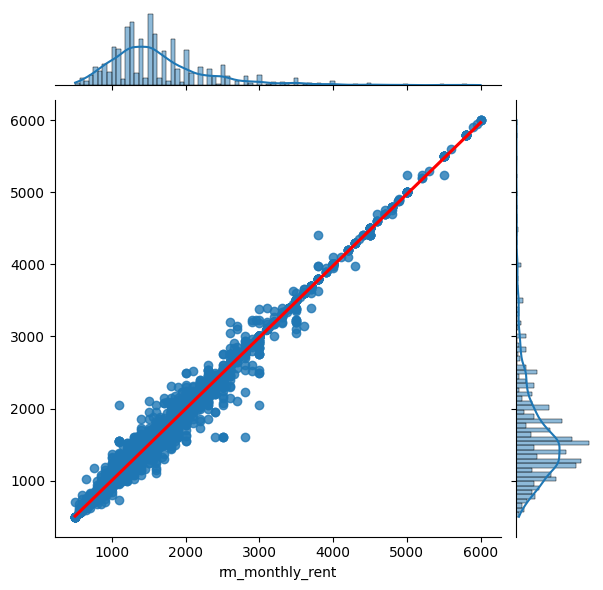

In [272]:
sns.jointplot(x=y_train, y=dtree_prediction_train, kind='reg', line_kws={'color': 'red'})

In [126]:
dtree_test = DecisionTreeRegressor(random_state = 42).fit(X_train, y_train)

dtree_prediction_test = dtree_test.predict(X_test)

r2_dtree_test = r2_score(y_test, dtree_prediction_test)
mae_dtree_test = mean_absolute_error(y_test, dtree_prediction_test)
mse_dtree_test =  mean_squared_error(y_test, dtree_prediction_test)
rmse_dtree_test =  np.sqrt(mse_dtree_test)

In [127]:
print(f"R2 score: {r2_dtree_test:.4f}")
print(f"MAE score: {mae_dtree_test:.4f}")
print(f"MSE score: {mse_dtree_test:.4f}")
print(f"RMSE score: {rmse_dtree_test:.4f}")

R2 score: 0.7110
MAE score: 210.9653
MSE score: 148487.9980
RMSE score: 385.3414


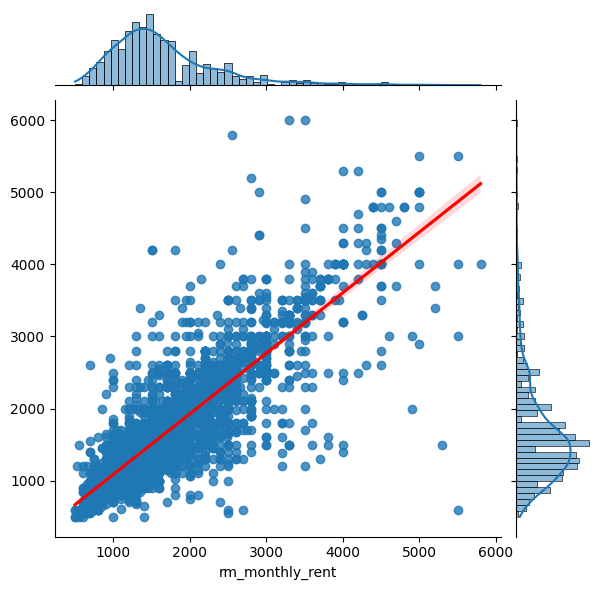

In [275]:
sns.jointplot(x = y_test, y = dtree_prediction_test, kind = 'reg', line_kws = {'color': 'red'})

### Random Forest

In [129]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

In [130]:
rf_tree_train = RandomForestRegressor(n_estimators = 100,
                                      criterion = "squared_error",
                                      max_features = "sqrt",
                                      random_state = 123)

In [131]:
rf_tree_train.fit(X_train, y_train)

RandomForestRegressor(max_features='sqrt', random_state=123)

In [278]:
y_train_pred_rf = rf_tree_train.predict(X_train)

r2_rf_train = r2_score(y_train, y_train_pred_rf)
mae_rf_train = mean_absolute_error(y_train, y_train_pred_rf)
mse_rf_train =  mean_squared_error(y_train, y_train_pred_rf)
rmse_rf_train =  np.sqrt(mse_rf_train)

print(f"R2 score: {r2_rf_train:.4f}") 
print(f"MAE score: {mae_rf_train:.4f}")
print(f"MSE score: {mse_rf_train:.4f}")
print(f"RMSE score: {rmse_rf_train:.4f}")

R2 score: 0.9684
MAE score: 79.6197
MSE score: 16610.3440
RMSE score: 128.8811


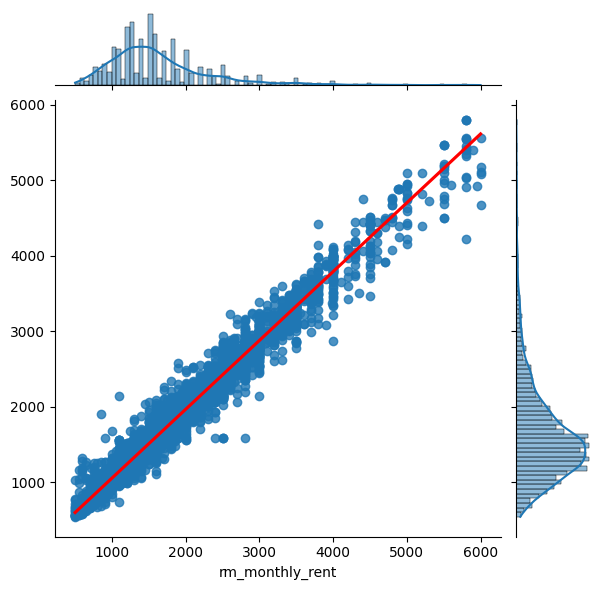

In [279]:
sns.jointplot(x = y_train, y = y_train_pred_rf, kind = 'reg', line_kws = {'color': 'red'})

In [281]:
y_test_pred_rf = rf_tree_train.predict(X_test)

r2_rf_test = r2_score(y_test, y_test_pred_rf)
mae_rf_test = mean_absolute_error(y_test, y_test_pred_rf)
mse_rf_test =  mean_squared_error(y_test, y_test_pred_rf)
rmse_rf_test =  np.sqrt(mse_rf_test)

print(f"R2 score: {r2_rf_test:.4f}") 
print(f"MAE score: {mae_rf_test:.4f}")
print(f"MSE score: {mse_rf_test:.4f}")
print(f"RMSE score: {rmse_rf_test:.4f}")

R2 score: 0.8314
MAE score: 180.3402
MSE score: 86603.0208
RMSE score: 294.2839


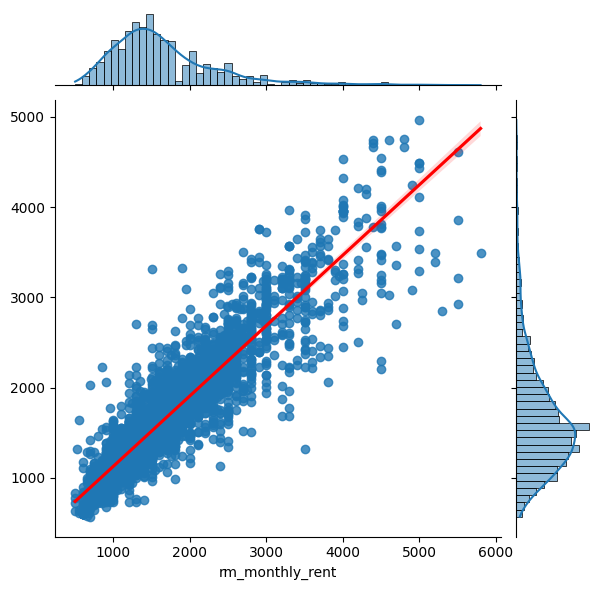

In [282]:
sns.jointplot(x = y_test, y = y_test_pred_rf, kind = 'reg', line_kws = {'color': 'red'})

### Random Forest + GridSearchCV

In [163]:
params = {"n_estimators": [100, 200, 300, 500],
          "max_features": ['sqrt', 'log2'],
          "random_state": [123],
          "criterion": ['squared_error', 'friedman_mse', 'poisson', 'absolute_error']}
rf = RandomForestRegressor()

rf_tree_train_cv = GridSearchCV(estimator = rf,
                          param_grid = params,
                          cv = 5,
                          scoring = "r2")

In [164]:
rf_tree_train_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'poisson', 'absolute_error'],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [100, 200, 300, 500],
                         'random_state': [123]},
             scoring='r2')

In [165]:
rf_tree_train_cv.best_params_

{'criterion': 'squared_error',
 'max_features': 'log2',
 'n_estimators': 200,
 'random_state': 123}

In [166]:
rf_tree_train_best = RandomForestRegressor(criterion = rf_tree_train_cv.best_params_["criterion"],
                                           max_features = rf_tree_train_cv.best_params_["max_features"],
                                           n_estimators = rf_tree_train_cv.best_params_["n_estimators"],
                                           random_state = rf_tree_train_cv.best_params_["random_state"])

rf_tree_train_best.fit(X_train, y_train)

RandomForestRegressor(max_features='log2', n_estimators=200, random_state=123)

In [167]:
y_train_pred_cv = rf_tree_train_best.predict(X_train)

r2_rf_train_cv = r2_score(y_train, y_train_pred_cv)
mae_rf_train_cv = mean_absolute_error(y_train, y_train_pred_cv)
mse_rf_train_cv =  mean_squared_error(y_train, y_train_pred_cv)
rmse_rf_train_cv =  np.sqrt(mse_rf_train_cv)

print(f"R2 score: {r2_rf_train_cv:.4f}") 
print(f"MAE score: {mae_rf_train_cv:.4f}")
print(f"MSE score: {mse_rf_train_cv:.4f}")
print(f"RMSE score: {rmse_rf_train_cv:.4f}")

R2 score: 0.9693
MAE score: 78.8553
MSE score: 16105.4384
RMSE score: 126.9072


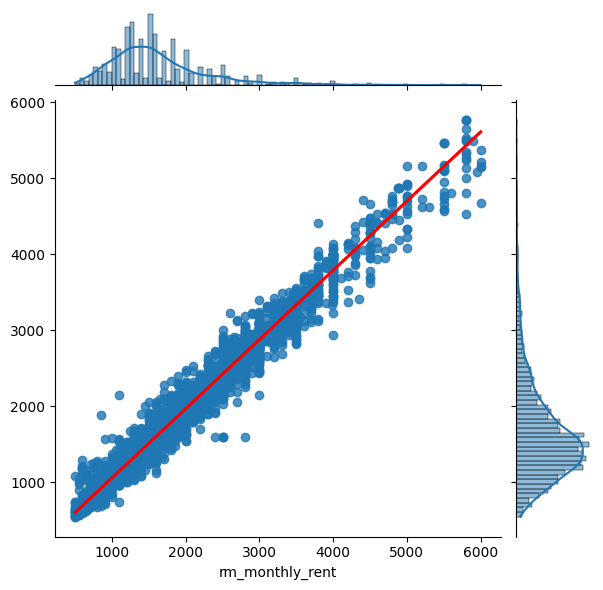

In [283]:
sns.jointplot(x = y_train, y = y_train_pred_cv, kind = 'reg', line_kws = {'color': 'red'})

In [169]:
rf_tree_test_best = RandomForestRegressor(criterion = rf_tree_train_cv.best_params_["criterion"],
                                           max_features = rf_tree_train_cv.best_params_["max_features"],
                                           n_estimators = rf_tree_train_cv.best_params_["n_estimators"],
                                           random_state = rf_tree_train_cv.best_params_["random_state"])

rf_tree_test_best.fit(X_train, y_train)

RandomForestRegressor(max_features='log2', n_estimators=200, random_state=123)

In [170]:
y_test_pred_cv = rf_tree_train_best.predict(X_test)

r2_rf_test_cv = r2_score(y_test, y_test_pred_cv)
mae_rf_test_cv = mean_absolute_error(y_test, y_test_pred_cv)
mse_rf_test_cv =  mean_squared_error(y_test, y_test_pred_cv)
rmse_rf_test_cv =  np.sqrt(mse_rf_test_cv)

print(f"R2 score: {r2_rf_test_cv:.4f}") 
print(f"MAE score: {mae_rf_test_cv:.4f}")
print(f"MSE score: {mse_rf_test_cv:.4f}")
print(f"RMSE score: {rmse_rf_test_cv:.4f}")

R2 score: 0.8307
MAE score: 179.5684
MSE score: 86971.2003
RMSE score: 294.9088


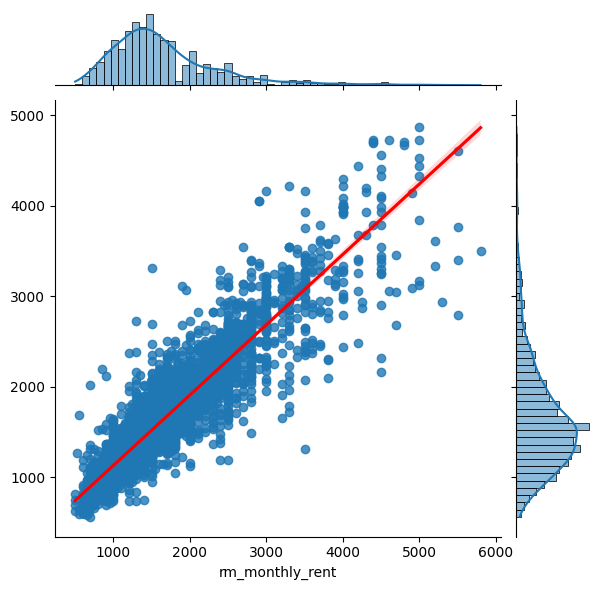

In [284]:
sns.jointplot(x = y_test, y = y_test_pred_cv, kind = 'reg', line_kws = {'color': 'red'})

### Gradient Boosting

In [142]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [143]:
train_gb_tree = GradientBoostingRegressor(random_state = 123).fit(X_train, y_train)

In [144]:
y_pred_train_gb = train_gb_tree.predict(X_train)

r2_gb_train = r2_score(y_train, y_pred_train_gb)
mae_gb_train = mean_absolute_error(y_train, y_pred_train_gb)
mse_gb_train =  mean_squared_error(y_train, y_pred_train_gb)
rmse_gb_train =  np.sqrt(mse_gb_train)

print(f"R2 score: {r2_gb_train:.4f}") 
print(f"MAE score: {mae_gb_train:.4f}")
print(f"MSE score: {mse_gb_train:.4f}")
print(f"RMSE score: {rmse_gb_train:.4f}")

R2 score: 0.7187
MAE score: 267.0739
MSE score: 147819.1744
RMSE score: 384.4726


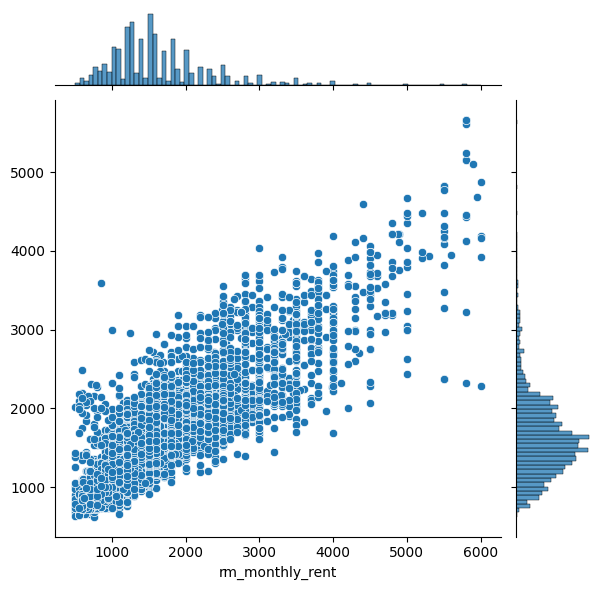

In [145]:
sns.jointplot(x = y_train, y = y_pred_train_gb)

### Gradient Boosting + GridSearchCV

In [146]:
from sklearn.model_selection import GridSearchCV 

In [147]:
params = {"n_estimators": [50, 100, 200, 300, 400, 500],
          "criterion": ['squared_error', 'friedman_mse'],
          "max_features": ['sqrt', 'log2'],
          "learning_rate": [0.01, 0.05, 0.1, 1],
          "max_depth": [1, 3, 5, 7, 9],
          "random_state": [123]}

gb = GradientBoostingRegressor()

gb_tree_cv = GridSearchCV(estimator = gb,
                          param_grid = params,
                          cv = 5,
                          scoring = 'r2')

In [148]:
gb_tree_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'criterion': ['squared_error', 'friedman_mse'],
                         'learning_rate': [0.01, 0.05, 0.1, 1],
                         'max_depth': [1, 3, 5, 7, 9],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [50, 100, 200, 300, 400, 500],
                         'random_state': [123]},
             scoring='r2')

In [149]:
gb_tree_cv.best_params_

{'criterion': 'friedman_mse',
 'learning_rate': 0.1,
 'max_depth': 9,
 'max_features': 'sqrt',
 'n_estimators': 500,
 'random_state': 123}

In [150]:
gb_tree_train_best = GradientBoostingRegressor(n_estimators = gb_tree_cv.best_params_["n_estimators"],
                                           criterion = gb_tree_cv.best_params_["criterion"],
                                           max_features = gb_tree_cv.best_params_["max_features"],
                                           random_state = gb_tree_cv.best_params_["random_state"],
                                           max_depth = gb_tree_cv.best_params_["max_depth"])

In [151]:
gb_tree_train_best.fit(X_train, y_train)

GradientBoostingRegressor(max_depth=9, max_features='sqrt', n_estimators=500,
                          random_state=123)

In [152]:
y_train_pred_gb_cv = gb_tree_train_best.predict(X_train)

In [153]:
r2_gb_train_cv = r2_score(y_train, y_train_pred_gb_cv)
mae_gb_train_cv = mean_absolute_error(y_train, y_train_pred_gb_cv)
mse_gb_train_cv =  mean_squared_error(y_train, y_train_pred_gb_cv)
rmse_gb_train_cv =  np.sqrt(mse_gb_train_cv)

print(f"R2 score: {r2_gb_train_cv:.4f}") 
print(f"MAE score: {mae_gb_train_cv:.4f}")
print(f"MSE score: {mse_gb_train_cv:.4f}")
print(f"RMSE score: {rmse_gb_train_cv:.4f}")

R2 score: 0.9600
MAE score: 95.2550
MSE score: 21032.0964
RMSE score: 145.0245


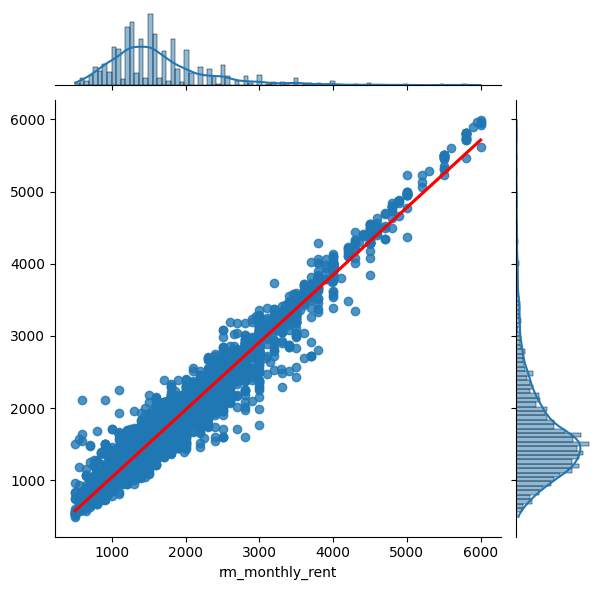

In [285]:
sns.jointplot(x = y_train, y = y_train_pred_gb_cv, kind = 'reg', line_kws = {'color': 'red'})

In [155]:
gb_tree_test_best = GradientBoostingRegressor(n_estimators = gb_tree_cv.best_params_["n_estimators"],
                                           criterion = gb_tree_cv.best_params_["criterion"],
                                           max_features = gb_tree_cv.best_params_["max_features"],
                                           random_state = gb_tree_cv.best_params_["random_state"],
                                           max_depth = gb_tree_cv.best_params_["max_depth"])

In [156]:
gb_tree_test_best.fit(X_train, y_train)

GradientBoostingRegressor(max_depth=9, max_features='sqrt', n_estimators=500,
                          random_state=123)

In [157]:
y_test_pred_gb_cv = gb_tree_test_best.predict(X_test)

In [158]:
r2_gb_test_cv = r2_score(y_test, y_test_pred_gb_cv)
mae_gb_test_cv = mean_absolute_error(y_test, y_test_pred_gb_cv)
mse_gb_test_cv =  mean_squared_error(y_test, y_test_pred_gb_cv)
rmse_gb_test_cv =  np.sqrt(mse_gb_test_cv)

print(f"R2 score: {r2_gb_test_cv:.4f}") 
print(f"MAE score: {mae_gb_test_cv:.4f}")
print(f"MSE score: {mse_gb_test_cv:.4f}")
print(f"RMSE score: {rmse_gb_test_cv:.4f}")

R2 score: 0.8452
MAE score: 178.6037
MSE score: 79503.1113
RMSE score: 281.9630


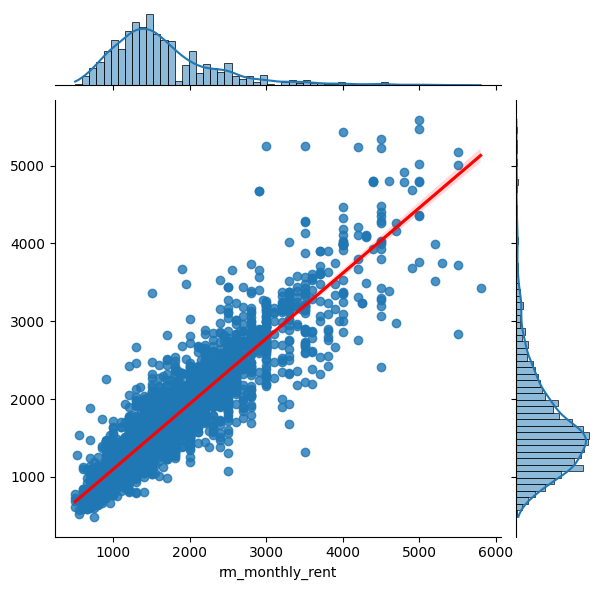

In [286]:
sns.jointplot(x = y_test, y = y_test_pred_gb_cv, kind = 'reg', line_kws = {'color': 'red'})

### CatBoost

In [148]:
df_catboost = pd.concat([df_cleaned_cat, df_cleaned_cont], axis = 1)

In [152]:
df_catboost.to_csv('cleaned1_catboost.csv', index = False)

In [153]:
df_catboost.head()

,location,property_type,furnished,completion_year,rooms,parking,bathroom,number_facilities,public_transport,size_sqf,rm_monthly_rent
0,Kota Damansara,Apartment,Fully Furnished,2006.00,3.00,1.00,2.00,1.00,0,800.00,1200.00
1,Gombak,Condominium,Partially Furnished,2017.00,3.00,1.00,2.00,11.00,1,1100.00,1600.00
2,Gombak,Condominium,Partially Furnished,2017.00,3.00,1.00,2.00,11.00,1,1338.00,1800.00
3,Gombak,Condominium,Not Furnished,2017.00,3.00,1.00,2.00,12.00,1,1100.00,1400.00
4,Gombak,Condominium,Not Furnished,2017.00,3.00,1.00,2.00,12.00,1,1338.00,1500.00


In [149]:
def seperate_input_output_catboost(data_catboost, output_name_catboost):
    output_y_catboost = data_catboost[output_name_catboost]
    input_x_catboost = data_catboost.drop(output_name_catboost, axis = 1)
    
    return input_x_catboost, output_y_catboost

In [150]:
dfx_catboost, dfy_catboost = seperate_input_output_catboost (data_catboost = df_catboost, output_name_catboost = 'rm_monthly_rent')

In [197]:
cat_col = dfx_catboost.select_dtypes(include = ['object']).columns.tolist()
cat_loc = [dfx_catboost.columns.get_loc(col) for col in cat_col]
print(cat_col)
print(cat_loc)

['location', 'property_type', 'furnished']
[0, 1, 2]


In [180]:
X_train_catboost, X_test_catboost, y_train_catboost, y_test_catboost = train_test_split(dfx_catboost,
                                                                                        dfy_catboost,
                                                                                        test_size = 0.3,
                                                                                        random_state = 42)

print("X_train_catboost: ", X_train_catboost.shape)
print("X_test_catboost: ", X_test_catboost.shape)
print("y_train_catboost: ", y_train_catboost.shape)
print("y_test_catboost: ", y_test_catboost.shape)

X_train_catboost:  (11373, 10)
X_test_catboost:  (4875, 10)
y_train_catboost:  (11373,)
y_test_catboost:  (4875,)


In [190]:
import catboost as cb

In [191]:
train_catboost = cb.Pool(data = X_train_catboost,
                      label = y_train_catboost,
                      cat_features = cat_loc)

test_catboost = cb.Pool(data = X_test_catboost,
                     label = y_test_catboost,
                     cat_features = cat_loc)

In [219]:
catboost_model = cb.CatBoostRegressor(iterations = 50,
                                      depth = 5,
                                      learning_rate = 0.1,
                                      loss_function = 'RMSE')

catboost_model.fit(X_train_catboost, y_train_catboost,
                  cat_features = cat_loc,
                  eval_set = (X_test_catboost, y_test_catboost))

In [211]:
y_train_pred_catboost = catboost_model.predict(X_train_catboost)

In [321]:
r2_catboost_train = r2_score(y_train_catboost, y_train_pred_catboost)
mae_catboost_train = mean_absolute_error(y_train_catboost, y_train_pred_catboost)
mse_catboost_train =  mean_squared_error(y_train_catboost, y_train_pred_catboost)
rmse_catboost_train =  np.sqrt(mse_catboost_train)

print(f"R2 score: {r2_catboost_train:.4f}") 
print(f"MAE score: {mae_catboost_train:.4f}")
print(f"MSE score: {mse_catboost_train:.4f}")
print(f"RMSE score: {rmse_catboost_train:.4f}")

R2 score: 0.7080
MAE score: 267.8667
MSE score: 153413.1982
RMSE score: 391.6800


In [214]:
y_test_pred_catboost = catboost_model.predict(X_test_catboost)

In [215]:
r2_catboost_test = r2_score(y_test_catboost, y_test_pred_catboost)
mae_catboost_test = mean_absolute_error(y_test_catboost, y_test_pred_catboost)
mse_catboost_test =  mean_squared_error(y_test_catboost, y_test_pred_catboost)
rmse_catboost_test =  np.sqrt(mse_catboost_test)

print(f"R2 score: {r2_catboost_test:.4f}") 
print(f"MAE score: {mae_catboost_test:.4f}")
print(f"MSE score: {mse_catboost_test:.4f}")
print(f"RMSE score: {rmse_catboost_test:.4f}")

R2 score: 0.6984
MAE score: 270.8429
MSE score: 154956.1862
RMSE score: 393.6447


### Catboost + GridSearchCV

In [342]:
param_grid_catboost = {"iterations": [2500],
                       "learning_rate": [0.01, 0.05, 0.1],
                       "depth": [8, 9, 10]}

In [343]:
from sklearn.metrics import make_scorer, mean_squared_error

catboost_model_cv = cb.CatBoostRegressor(l2_leaf_reg = 1, bagging_temperature = 0)

catboost_grid_search = GridSearchCV(estimator=catboost_model_cv,
                                    param_grid=param_grid_catboost,
                                    cv=5,
                                    scoring='r2',
                                    n_jobs=-1)

catboost_grid_search.fit(X_train_catboost, y_train_catboost,
                         cat_features=cat_loc,
                         eval_set=((X_test_catboost, y_test_catboost)))


0:	learn: 707.4171693	test: 701.3749262	best: 701.3749262 (0)	total: 62.2ms	remaining: 2m 35s
1:	learn: 690.5368861	test: 685.8561472	best: 685.8561472 (1)	total: 129ms	remaining: 2m 41s
2:	learn: 675.1616009	test: 671.5639876	best: 671.5639876 (2)	total: 190ms	remaining: 2m 37s
3:	learn: 660.3363988	test: 657.8767849	best: 657.8767849 (3)	total: 254ms	remaining: 2m 38s
4:	learn: 647.4727668	test: 644.9737634	best: 644.9737634 (4)	total: 322ms	remaining: 2m 40s
5:	learn: 635.2713981	test: 633.1006673	best: 633.1006673 (5)	total: 386ms	remaining: 2m 40s
6:	learn: 625.2866222	test: 623.4240784	best: 623.4240784 (6)	total: 426ms	remaining: 2m 31s
7:	learn: 615.2493711	test: 613.7916072	best: 613.7916072 (7)	total: 487ms	remaining: 2m 31s
8:	learn: 605.0057105	test: 604.2514262	best: 604.2514262 (8)	total: 548ms	remaining: 2m 31s
9:	learn: 591.4356666	test: 590.8375249	best: 590.8375249 (9)	total: 613ms	remaining: 2m 32s
10:	learn: 578.5939546	test: 577.5475429	best: 577.5475429 (10)	total

GridSearchCV(cv=5,
             estimator=<catboost.core.CatBoostRegressor object at 0x0000020CF7DD7E80>,
             n_jobs=-1,
             param_grid={'depth': [8, 9, 10], 'iterations': [2500],
                         'learning_rate': [0.01, 0.05, 0.1]},
             scoring='r2')

In [344]:
y_train_pred_catboost_cv = catboost_grid_search.predict(X_train_catboost)

In [345]:
r2_catboost_train_cv = r2_score(y_train_catboost, y_train_pred_catboost_cv)
mae_catboost_train_cv = mean_absolute_error(y_train_catboost, y_train_pred_catboost_cv)
mse_catboost_train_cv =  mean_squared_error(y_train_catboost, y_train_pred_catboost_cv)
rmse_catboost_train_cv =  np.sqrt(mse_catboost_train_cv)

print(f"R2 score: {r2_catboost_train_cv:.4f}") 
print(f"MAE score: {mae_catboost_train_cv:.4f}")
print(f"MSE score: {mse_catboost_train_cv:.4f}")
print(f"RMSE score: {rmse_catboost_train_cv:.4f}")

R2 score: 0.9394
MAE score: 121.2137
MSE score: 31820.9707
RMSE score: 178.3843


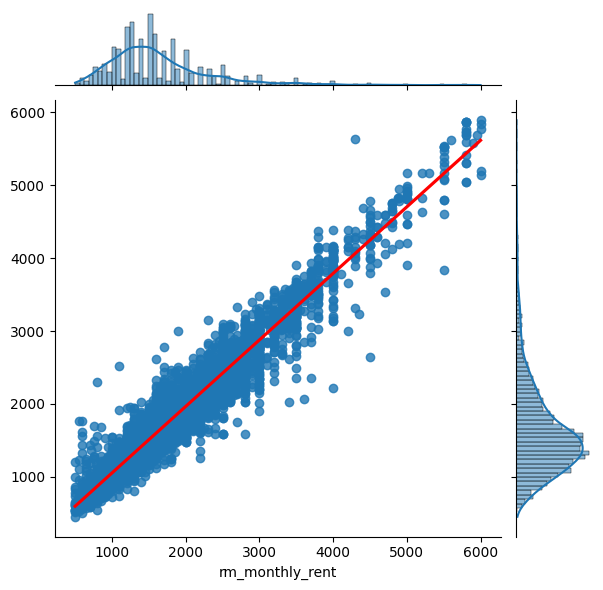

In [346]:
sns.jointplot(x = y_train_catboost, y = y_train_pred_catboost_cv, kind = 'reg', line_kws = {'color': 'red'})

In [347]:
y_test_pred_catboost_cv = catboost_grid_search.predict(X_test_catboost)

In [349]:
r2_catboost_test_cv = r2_score(y_test_catboost, y_test_pred_catboost_cv)
mae_catboost_test_cv = mean_absolute_error(y_test_catboost, y_test_pred_catboost_cv)
mse_catboost_test_cv =  mean_squared_error(y_test_catboost, y_test_pred_catboost_cv)
rmse_catboost_test_cv =  np.sqrt(mse_catboost_test_cv)

print(f"R2 score: {r2_catboost_test_cv:.4f}") 
print(f"MAE score: {mae_catboost_test_cv:.4f}")
print(f"MSE score: {mse_catboost_test_cv:.4f}")
print(f"RMSE score: {rmse_catboost_test_cv:.4f}")

R2 score: 0.8436
MAE score: 182.6509
MSE score: 80359.6301
RMSE score: 283.4777


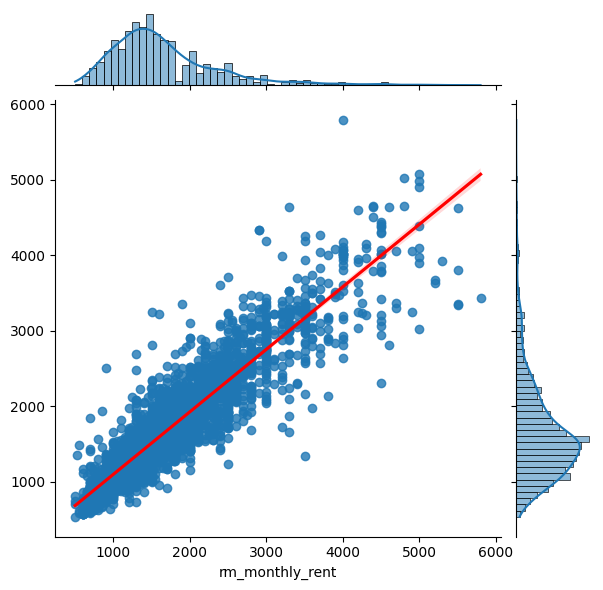

In [350]:
sns.jointplot(x = y_test_catboost, y = y_test_pred_catboost_cv, kind = 'reg', line_kws = {'color': 'red'})

### Summary of all the outputs

In [351]:
r2_score_train = [r2_dtree_train, r2_rf_train, r2_rf_train_cv, r2_gb_train_cv, r2_catboost_train_cv]
r2_score_test = [r2_dtree_test, r2_rf_test, r2_rf_test_cv, r2_gb_test_cv, r2_catboost_test_cv]

mae_score_train = [mae_dtree_train, mae_rf_train, mae_rf_train_cv, mae_gb_train_cv, mae_catboost_train_cv]
mae_score_test = [mae_dtree_test, mae_rf_test, mae_rf_test_cv, mae_gb_test_cv, mae_catboost_test_cv]

mse_score_train = [mse_dtree_train, mse_rf_train, mse_rf_train_cv, mse_gb_train_cv, mse_catboost_train_cv]
mse_score_test = [mse_dtree_test, mse_rf_test, mse_rf_test_cv, mse_gb_test_cv, mse_catboost_test_cv]

rmse_score_train = [rmse_dtree_train, rmse_rf_train, rmse_rf_train_cv, rmse_gb_train_cv, rmse_catboost_train_cv]
rmse_score_test = [rmse_dtree_test, rmse_rf_test, rmse_rf_test_cv, rmse_gb_test_cv, rmse_catboost_test_cv]

indexes = ["Decision Tree", "Random Forest", "Random Forest with GridSearchCV", "Gradient Boosting with GridSearchCV",  "CatBoost with GridSearchCV"]

model_outputs = pd.DataFrame({
    "R2-Score Train": r2_score_train,
    "R2-Score Test": r2_score_test,
    "MAE Score Train": mae_score_train,
    "MAE Score Test": mae_score_test,
    "MSE Score Train": mse_score_train,
    "MSE Score Test": mse_score_test,
    "RMSE Score Train": rmse_score_train,
    "RMSE Score Test": rmse_score_test
},index = indexes)

model_outputs

,R2-Score Train,R2-Score Test,MAE Score Train,MAE Score Test,MSE Score Train,MSE Score Test,RMSE Score Train,RMSE Score Test
Decision Tree,0.99,0.71,22.31,210.97,4234.37,148488.00,65.07,385.34
Random Forest,0.97,0.83,79.62,180.34,16610.34,86603.02,128.88,294.28
Random Forest with GridSearchCV,0.97,0.83,78.86,179.57,16105.44,86971.20,126.91,294.91
Gradient Boosting with GridSearchCV,0.96,0.85,95.26,178.60,21032.10,79503.11,145.02,281.96
CatBoost with GridSearchCV,0.94,0.84,121.21,182.65,31820.97,80359.63,178.38,283.48


1. CatBoost has less overfitting compared to Gradient Boosting even though its only by a
very small margin, thus it should be able to generalize unseen and new data slightly 
better than Gradient Boosting.
2. The MAE, MSE and RMSE score between these two models are very similar. However, 
when taking into consideration other than the evaluation metrics score, CatBoost has 
added advantages such as having better ability to handle categorical variables, thus 
leading to better interpretability and a much faster training time when compared to 
Gradient Boosting. All of these are also essential when taking into consideration on 
which is the best model to be used.

## Feature Importance

In [352]:
best_catboost_model = catboost_grid_search.best_estimator_
feature_importance = best_catboost_model.get_feature_importance()
feature_names = X_train_catboost.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

feature_importance_df.reset_index()

,index,Feature,Importance
0,0,location,24.07
1,9,size_sqf,21.15
2,3,completion_year,14.57
3,2,furnished,14.50
4,1,property_type,8.84
5,7,number_facilities,5.23
6,4,rooms,4.30
7,6,bathroom,3.92
8,5,parking,2.60
9,8,public_transport,0.79


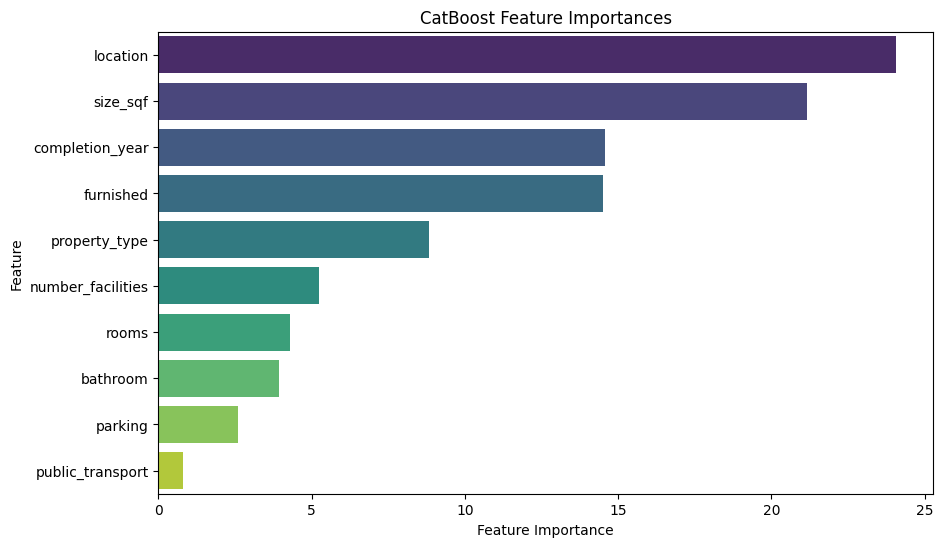

In [354]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('CatBoost Feature Importances')
plt.show()

The unexpected anomalies would be public transport. For public transport to have lower 
importance value compared to features such as parking and bathroom is truly surprising. Public 
transport in the region of Selangor and Kuala Lumpur is heavily used, especially for young 
working adults and students. Therefore, these groups of people tend to prefer having any form of 
public transportation within their property proximity.

In [355]:
import joblib
model_joblib = "catboost_model.joblib"
joblib.dump(catboost_grid_search, model_joblib)

['catboost_model.joblib']